# Mathematical Modelling Practice
## Author: Lajos Ádám Váradi - OTP06A

### Dataset details:
- Used dataset: IP Network Traffic Flows Labeled with 75 Apps
- Downloaded from Kaggle: https://www.kaggle.com/datasets/jsrojas/ip-network-traffic-flows-labeled-with-87-apps

# Applying the CRISP-DM method

The CRISP-DM method will be followed during this project, which serves as a general compass for all data science/data mining projects.

CRISP-DM: **<u>CR</u>**oss **<u>I</u>**ndustry **<u>S</u>**tandard **<u>P</u>**rocess for **<u>D</u>**ata **<u>M</u>**ining

CRISP-DM defines six sequential phases:
1. Business understanding: What does the business need?

2. Data understanding – What data do we have / need? Is it clean?

3. Data preparation – How do we organize the data for modeling?

4. Modeling – What modeling techniques should we apply?

5. Evaluation and model refinement - Which model best meets the business objectives?

6. Deployment – How do stakeholders access the results?

In this specific project, we will deviate from this sequence a bit:
- A clear business goal was not received in the project, it will be worked out and refined with the supervisor. Therefore, we will do first the Data understanding, and afterwards we will formulate the "Business goals and Business understanding". So basically we will switch the 1st and 2nd steps.
- The 6th step (Deployment) is not applicable in our case, there is no need to deploy the model.

# Data understanding

### Importing required packages

In [1]:
# Manipulations are needed with the system path to have access to all required packages
# This was needed, since it is not allowed to modify the default Anaconda environment for my corporate notebook
import sys
sys.path
sys.path.append('C:\\Users\\AVA2BP\\.conda\\envs\\custom_environment\\Lib\\site-packages')
orig_sys_path = sys.path
sys.path = ['C:\\Program Files\\Anaconda3\\python39.zip',
 'C:\\Program Files\\Anaconda3\\DLLs',
 'C:\\Program Files\\Anaconda3\\lib',
 'C:\\Program Files\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Program Files\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Program Files\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Program Files\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Program Files\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\AVA2BP\\.ipython',
 'C:\\Users\\AVA2BP\\.conda\\envs\\custom_environment\\Lib\\site-packages']
import imblearn
sys.path = orig_sys_path

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
import category_encoders as ce

### Reading the data

In [3]:
data_path = "Dataset-Unicauca-Version2-87Atts.csv"
df = pd.read_csv(data_path)
pd.set_option('max_columns', None)

### Data shape

In [4]:
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,110414.0,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698.0,41178.0,762.555556,1230.348220,5133.0,1.0,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0.0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,0.0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0.0,107.0,53.500000,75.660426,107.0,0.0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0.0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packet.Length.Max        int64  
 13  Fwd.Packet.Length.Min        int64  
 14  Fwd.Packet.Length.Mean       float64
 15  Fwd.Packet.Length.Std        float64
 16  Bwd.Packet.Length.Max        int64  
 17  Bwd.Packet.Length.Min        int64  
 18  Bwd.Packet.Length.Mean       float64
 19  

In [6]:
df.describe()

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3577296.0,3577296.0,3577296.0,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3577296.0,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3577296.0,3577296.0,3577296.0,3577296.0,3577296.0,3577296.0,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,3.799938e+04,1.204246e+04,6.005508e+00,2.544247e+07,6.237799e+01,6.534083e+01,4.683323e+04,8.445742e+04,5.123645e+02,9.340408e+00,1.149212e+02,1.520501e+02,1.103231e+03,1.113491e+01,2.547845e+02,2.898878e+02,4.048709e+06,8.896338e+04,1.422201e+06,3.365395e+06,1.285020e+07,8.870201e+04,2.418796e+07,3.124467e+06,3.649620e+06,1.209624e+07,1.271532e+06,2.110451e+07,2.476877e+06,2.932460e+06,9.830803e+06,8.889991e+05,1.720414e-01,0.0,0.0,0.0,1.653339e+03,1.743621e+03,7.705816e+04,1.190522e+04,3.043745e+00,1.333250e+03,1.988191e+02,3.035190e+02,2.792736e+05,7.037159e-03,1.720414e-01,6.655865e-04,4.058210e-01,5.995705e-01,2.773847e-01,0.0,6.566412e-04,9.085471e-01,2.075630e+02,1.149212e+02,2.547845e+02,1.653339e+03,0.0,0.0,0.0,0.0,0.0,0.0,6.237799e+01,4.683323e+04,6.534083e+01,8.445742e+04,8.984691e+03,2.123489e+03,4.503535e+01,2.569738e+01,2.981990e+05,1.836406e+05,5.229372e+05,1.676336e+05,8.524211e+06,1.370991e+06,9.743845e+06,7.252097e+06,1.029508e+02
std,2.201713e+04,2.044916e+04,3.274574e-01,4.014430e+07,1.094086e+03,1.108092e+03,1.816196e+06,2.124319e+06,1.039319e+03,8.299983e+01,2.464707e+02,2.404702e+02,2.352374e+03,1.055422e+02,5.060731e+02,4.853004e+02,7.551040e+07,4.027620e+05,3.550414e+06,6.260959e+06,2.076518e+07,1.605272e+06,3.962563e+07,8.358652e+06,7.390979e+06,2.049180e+07,7.279117e+06,3.862634e+07,7.578111e+06,6.666650e+06,1.883521e+07,6.231082e+06,3.774165e-01,0.0,0.0,0.0,3.008890e+04,3.039190e+04,3.683153e+05,1.080206e+05,4.145472e+01,2.453395e+03,3.327427e+02,4.326083e+02,7.258608e+05,8.359210e-02,3.774165e-01,2.579038e-02,4.910503e-01,4.899855e-01,4.477080e-01,0.0,2.561660e-02,1.269945e

In [7]:
print("The data set consists of " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " attributes.")

The data set consists of 3577296 rows and 87 attributes.


**Remark:** This particular dataset is fairly big, consist of more than 3.5 million entries, and the belonging 87 attributes for each of them.

### Variables overview

Preliminary classification of categorical and numerical variables. At first, we will try to identify the type of the variables based on their value type:
- object --> categorical
- int64, float64 --> numerical

In [8]:
attributes = df.columns.tolist()
categorical = []
numerical = []

for col in attributes:
    if ((df[col].dtype == 'int64') or (df[col].dtype == 'float64')):
        numerical.append(col)
    elif (df[col].dtype == 'object'):
        categorical.append(col)

**List of numerical variables:**

In [9]:
for col in numerical:
    print(col)

Source.Port
Destination.Port
Protocol
Flow.Duration
Total.Fwd.Packets
Total.Backward.Packets
Total.Length.of.Fwd.Packets
Total.Length.of.Bwd.Packets
Fwd.Packet.Length.Max
Fwd.Packet.Length.Min
Fwd.Packet.Length.Mean
Fwd.Packet.Length.Std
Bwd.Packet.Length.Max
Bwd.Packet.Length.Min
Bwd.Packet.Length.Mean
Bwd.Packet.Length.Std
Flow.Bytes.s
Flow.Packets.s
Flow.IAT.Mean
Flow.IAT.Std
Flow.IAT.Max
Flow.IAT.Min
Fwd.IAT.Total
Fwd.IAT.Mean
Fwd.IAT.Std
Fwd.IAT.Max
Fwd.IAT.Min
Bwd.IAT.Total
Bwd.IAT.Mean
Bwd.IAT.Std
Bwd.IAT.Max
Bwd.IAT.Min
Fwd.PSH.Flags
Bwd.PSH.Flags
Fwd.URG.Flags
Bwd.URG.Flags
Fwd.Header.Length
Bwd.Header.Length
Fwd.Packets.s
Bwd.Packets.s
Min.Packet.Length
Max.Packet.Length
Packet.Length.Mean
Packet.Length.Std
Packet.Length.Variance
FIN.Flag.Count
SYN.Flag.Count
RST.Flag.Count
PSH.Flag.Count
ACK.Flag.Count
URG.Flag.Count
CWE.Flag.Count
ECE.Flag.Count
Down.Up.Ratio
Average.Packet.Size
Avg.Fwd.Segment.Size
Avg.Bwd.Segment.Size
Fwd.Header.Length.1
Fwd.Avg.Bytes.Bulk
Fwd.Avg.Packets

In [10]:
print("There are " + str(len(numerical)) + " numerical variables in total." )

There are 81 numerical variables in total.


**List of categorical variables:**

In [11]:
for col in categorical:
    print(col)

Flow.ID
Source.IP
Destination.IP
Timestamp
Label
ProtocolName


In [12]:
print("There are " + str(len(categorical)) + " categorical variables in total." )

There are 6 categorical variables in total.


By having a closer look on the data, one might come to the conclusion, that our approach of classifying the data was greedy, since some categorical cariables are already encoded. The `Source.Port`, `Destination.Port`, `Protocol`, `L7Protocol` can also be considered categorical.

In [13]:
# Brief look on the data:
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,110414.0,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698.0,41178.0,762.555556,1230.348220,5133.0,1.0,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0.0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,0.0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0.0,107.0,53.500000,75.660426,107.0,0.0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0.0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


As a result, we need to adjust the list of variables as follows:

In [14]:
categorical.append("Source.Port")
categorical.append("Destination.Port")
categorical.append("Protocol")
categorical.append("L7Protocol")

In [15]:
numerical.remove("Source.Port")
numerical.remove("Destination.Port")
numerical.remove("Protocol")
numerical.remove("L7Protocol")

In [16]:
# Only used to print the variables for the Markdown

#for var in categorical:
#    print("- "+var)
#print("\n")
#for var in numerical:
#    print("- "+var)

### The final classification of the variables looks like this:

**Categorical:**
- Flow.ID
- Source.IP
- Destination.IP
- Timestamp
- Label
- ProtocolName
- Source.Port
- Destination.Port
- Protocol
- L7Protocol

**Numerical:**
- Flow.Duration
- Total.Fwd.Packets
- Total.Backward.Packets
- Total.Length.of.Fwd.Packets
- Total.Length.of.Bwd.Packets
- Fwd.Packet.Length.Max
- Fwd.Packet.Length.Min
- Fwd.Packet.Length.Mean
- Fwd.Packet.Length.Std
- Bwd.Packet.Length.Max
- Bwd.Packet.Length.Min
- Bwd.Packet.Length.Mean
- Bwd.Packet.Length.Std
- Flow.Bytes.s
- Flow.Packets.s
- Flow.IAT.Mean
- Flow.IAT.Std
- Flow.IAT.Max
- Flow.IAT.Min
- Fwd.IAT.Total
- Fwd.IAT.Mean
- Fwd.IAT.Std
- Fwd.IAT.Max
- Fwd.IAT.Min
- Bwd.IAT.Total
- Bwd.IAT.Mean
- Bwd.IAT.Std
- Bwd.IAT.Max
- Bwd.IAT.Min
- Fwd.PSH.Flags
- Bwd.PSH.Flags
- Fwd.URG.Flags
- Bwd.URG.Flags
- Fwd.Header.Length
- Bwd.Header.Length
- Fwd.Packets.s
- Bwd.Packets.s
- Min.Packet.Length
- Max.Packet.Length
- Packet.Length.Mean
- Packet.Length.Std
- Packet.Length.Variance
- FIN.Flag.Count
- SYN.Flag.Count
- RST.Flag.Count
- PSH.Flag.Count
- ACK.Flag.Count
- URG.Flag.Count
- CWE.Flag.Count
- ECE.Flag.Count
- Down.Up.Ratio
- Average.Packet.Size
- Avg.Fwd.Segment.Size
- Avg.Bwd.Segment.Size
- Fwd.Header.Length.1
- Fwd.Avg.Bytes.Bulk
- Fwd.Avg.Packets.Bulk
- Fwd.Avg.Bulk.Rate
- Bwd.Avg.Bytes.Bulk
- Bwd.Avg.Packets.Bulk
- Bwd.Avg.Bulk.Rate
- Subflow.Fwd.Packets
- Subflow.Fwd.Bytes
- Subflow.Bwd.Packets
- Subflow.Bwd.Bytes
- Init_Win_bytes_forward
- Init_Win_bytes_backward
- act_data_pkt_fwd
- min_seg_size_forward
- Active.Mean
- Active.Std
- Active.Max
- Active.Min
- Idle.Mean
- Idle.Std
- Idle.Max
- Idle.Min

### Initial data cleaning

In this step, we make some data cleaning:
- we remove the NaNs from the data (if there is any)
- duplicate rows will be removed

**1st step:** check for NaN data:

In [17]:
total_nulls = df.isnull().sum()
total_observations = df.shape[0]
null_percentages = total_nulls[total_nulls > 0] / total_observations * 100
print(pd.concat([total_nulls, null_percentages], axis=1, keys=["Total", "Percentage"]).sort_values(by="Total", ascending=False))

# We are checking, whether there are any NaN values in the table.
check_nan = df.isnull().values.any()

print("\n")

# Printing the result
print("Are there any NaN records? " + str(check_nan))

# We can also make sure, that there are no NaN values by dropping them and
# checking the shape of the dataframe afterwards
df_shape_beforeDrop = df.shape
df.dropna(axis = 0, inplace = True)
df_shape_afterDrop = df.shape

print ("Is the shape of the dataset identical before and after dropping NaNs? "+\
       str(df_shape_beforeDrop == df_shape_afterDrop))

                      Total  Percentage
Flow.ID                   0         NaN
CWE.Flag.Count            0         NaN
Fwd.Avg.Packets.Bulk      0         NaN
Fwd.Avg.Bytes.Bulk        0         NaN
Fwd.Header.Length.1       0         NaN
...                     ...         ...
Fwd.IAT.Mean              0         NaN
Fwd.IAT.Total             0         NaN
Flow.IAT.Min              0         NaN
Flow.IAT.Max              0         NaN
ProtocolName              0         NaN

[87 rows x 2 columns]


Are there any NaN records? False
Is the shape of the dataset identical before and after dropping NaNs? True


**Remark:** Accoring to this analysis result, there aren't any NaN value in the data. In this regards, the data seem to be in good condition.

**2nd step:** Let's remove the duplicates in the data:

In [18]:
duplicates_index = df[df.duplicated(keep='first')].index
df.drop(duplicates_index, axis=0, inplace=True)

In [19]:
print(len(duplicates_index))

8144


In [20]:
# Make sure, that there are no duplicates left (this line need to give 0 as result):
duplicates_index = df[df.duplicated(keep='first')].index
print(len(duplicates_index))

0


**Remark:** There were in total 8144 duplicates in the data, which were removed with the above performed operations. At the end, we kept the first instance of the recurring data.

Take a look on the unique values within the categorical variables:

In [21]:
for col in categorical:
    print(col, ":", df[col].unique())
    print("\n")

Flow.ID : ['172.19.1.46-10.200.7.7-52422-3128-6'
 '10.200.7.217-50.31.185.39-38848-80-6'
 '192.168.72.43-10.200.7.7-55961-3128-6' ...
 '192.168.41.8-10.200.7.8-50493-3128-6'
 '192.168.130.51-10.200.7.9-64889-3128-6'
 '192.168.10.112-10.200.7.9-1235-3128-6']


Source.IP : ['172.19.1.46' '10.200.7.7' '50.31.185.39' ... '96.7.0.79' '98.138.47.34'
 '98.139.180.180']


Destination.IP : ['10.200.7.7' '172.19.1.46' '10.200.7.217' ... '172.18.1.207'
 '192.168.81.94' '192.168.32.19']


Timestamp : ['26/04/201711:11:17' '26/04/201711:11:18' '26/04/201711:11:19' ...
 '15/05/201705:43:18' '15/05/201705:37:07' '15/05/201705:39:05']


Label : ['BENIGN']


ProtocolName : ['HTTP_PROXY' 'HTTP' 'HTTP_CONNECT' 'SSL' 'GOOGLE' 'YOUTUBE' 'FACEBOOK'
 'CONTENT_FLASH' 'DROPBOX' 'WINDOWS_UPDATE' 'AMAZON' 'MICROSOFT' 'TOR'
 'GMAIL' 'YAHOO' 'MSN' 'SSL_NO_CERT' 'SKYPE' 'MS_ONE_DRIVE' 'MSSQL'
 'TWITTER' 'APPLE_ICLOUD' 'CLOUDFLARE' 'UBUNTUONE' 'OFFICE_365'
 'WIKIPEDIA' 'OPENSIGNAL' 'DNS' 'HTTP_DOWNLOAD' 'WHATSAPP' '

### Summary/ results of data understanding

By reading the description of the data provided on Kaggle, and performing a preliminary analysis on the data, the following key statements can be formulated:
- The data presented here was collected in a network section from Universidad Del Cauca, Popayán, Colombia by performing packet captures at different hours, during morning and afternoon, over six days (April 26, 27, 28 and May 9, 11 and 15) of 2017. A total of 3.577.296 instances were collected.
- This dataset contains 87 features. Each instance holds the information of an IP flow generated by a network device i.e., source and destination IP addresses, ports, interarrival times, layer 7 protocol (application) used on that flow as the class, among others. Most of the attributes are numeric type (in total 77) but there are also nominal types/categorical types (in total 10).
- **The dataset contains labeled data regarding the specific applications, to which the IP flow belongs to.**
- Condition of the data was checked (NaN values) and initial data cleaning was performed.

# Business understanding/ Goal setting

As a result of the data analysis, the following goal can be formulated:

- **Goal setting:** The goal is to generate a machine learning model, that is capable of predicting the application (`ProtocolName`) based on the IP flow statistics.
- As a result, `ProtocolName` will be the target variable, all other attributes can be used as predictors.

## Analysis of the target variable

Let's identify the unique applications within `ProtocolName` in this data set:

In [22]:
unique, counts = np.unique(df["ProtocolName"], return_counts = True)
Protocol_stats = [unique, counts]

print("Protocol name has the following unique values:")
print(unique)

Protocol name has the following unique values:
['99TAXI' 'AMAZON' 'APPLE' 'APPLE_ICLOUD' 'APPLE_ITUNES' 'BGP'
 'BITTORRENT' 'CITRIX' 'CITRIX_ONLINE' 'CLOUDFLARE' 'CNN' 'CONTENT_FLASH'
 'DEEZER' 'DNS' 'DROPBOX' 'EASYTAXI' 'EBAY' 'EDONKEY' 'FACEBOOK'
 'FTP_CONTROL' 'FTP_DATA' 'GMAIL' 'GOOGLE' 'GOOGLE_MAPS' 'H323' 'HTTP'
 'HTTP_CONNECT' 'HTTP_DOWNLOAD' 'HTTP_PROXY' 'INSTAGRAM' 'IP_ICMP'
 'IP_OSPF' 'LASTFM' 'LOTUS_NOTES' 'MAIL_IMAPS' 'MICROSOFT' 'MQTT' 'MSN'
 'MSSQL' 'MS_ONE_DRIVE' 'NETFLIX' 'NFS' 'NTP' 'OFFICE_365' 'OPENSIGNAL'
 'OPENVPN' 'ORACLE' 'OSCAR' 'QQ' 'RADIUS' 'RTMP' 'SIMET' 'SKINNY' 'SKYPE'
 'SNMP' 'SOCKS' 'SPOTIFY' 'SSH' 'SSL' 'SSL_NO_CERT' 'STARCRAFT'
 'TEAMSPEAK' 'TEAMVIEWER' 'TELEGRAM' 'TIMMEU' 'TOR' 'TWITCH' 'TWITTER'
 'UBUNTUONE' 'UNENCRYPED_JABBER' 'UPNP' 'WAZE' 'WHATSAPP' 'WHOIS_DAS'
 'WIKIPEDIA' 'WINDOWS_UPDATE' 'YAHOO' 'YOUTUBE']


In [23]:
print("According to these results, ProtocolName contains " + str(len(unique)) + " applications.")

According to these results, ProtocolName contains 78 applications.


Here we rearrange the multiplicity of the applications into ascending order:

In [24]:
Protocol_stats = np.vstack((unique, counts))
Protocol_stats = Protocol_stats.transpose()
Protocol_stats = Protocol_stats.tolist()

def sortFunct(e):
    return e[1]

Protocol_stats.sort(reverse = True, key=sortFunct)
Protocol_stats = np.array(Protocol_stats)
Protocol_stats = Protocol_stats.transpose()
Protocol_stats[0] = Protocol_stats[0][::-1]
Protocol_stats[1] = Protocol_stats[1][::-1]

A visual representation is created regarding the multiplicity of unique values within the `ProtocolName` target variable (please note, that the y-axis has a logaritmic scaling):

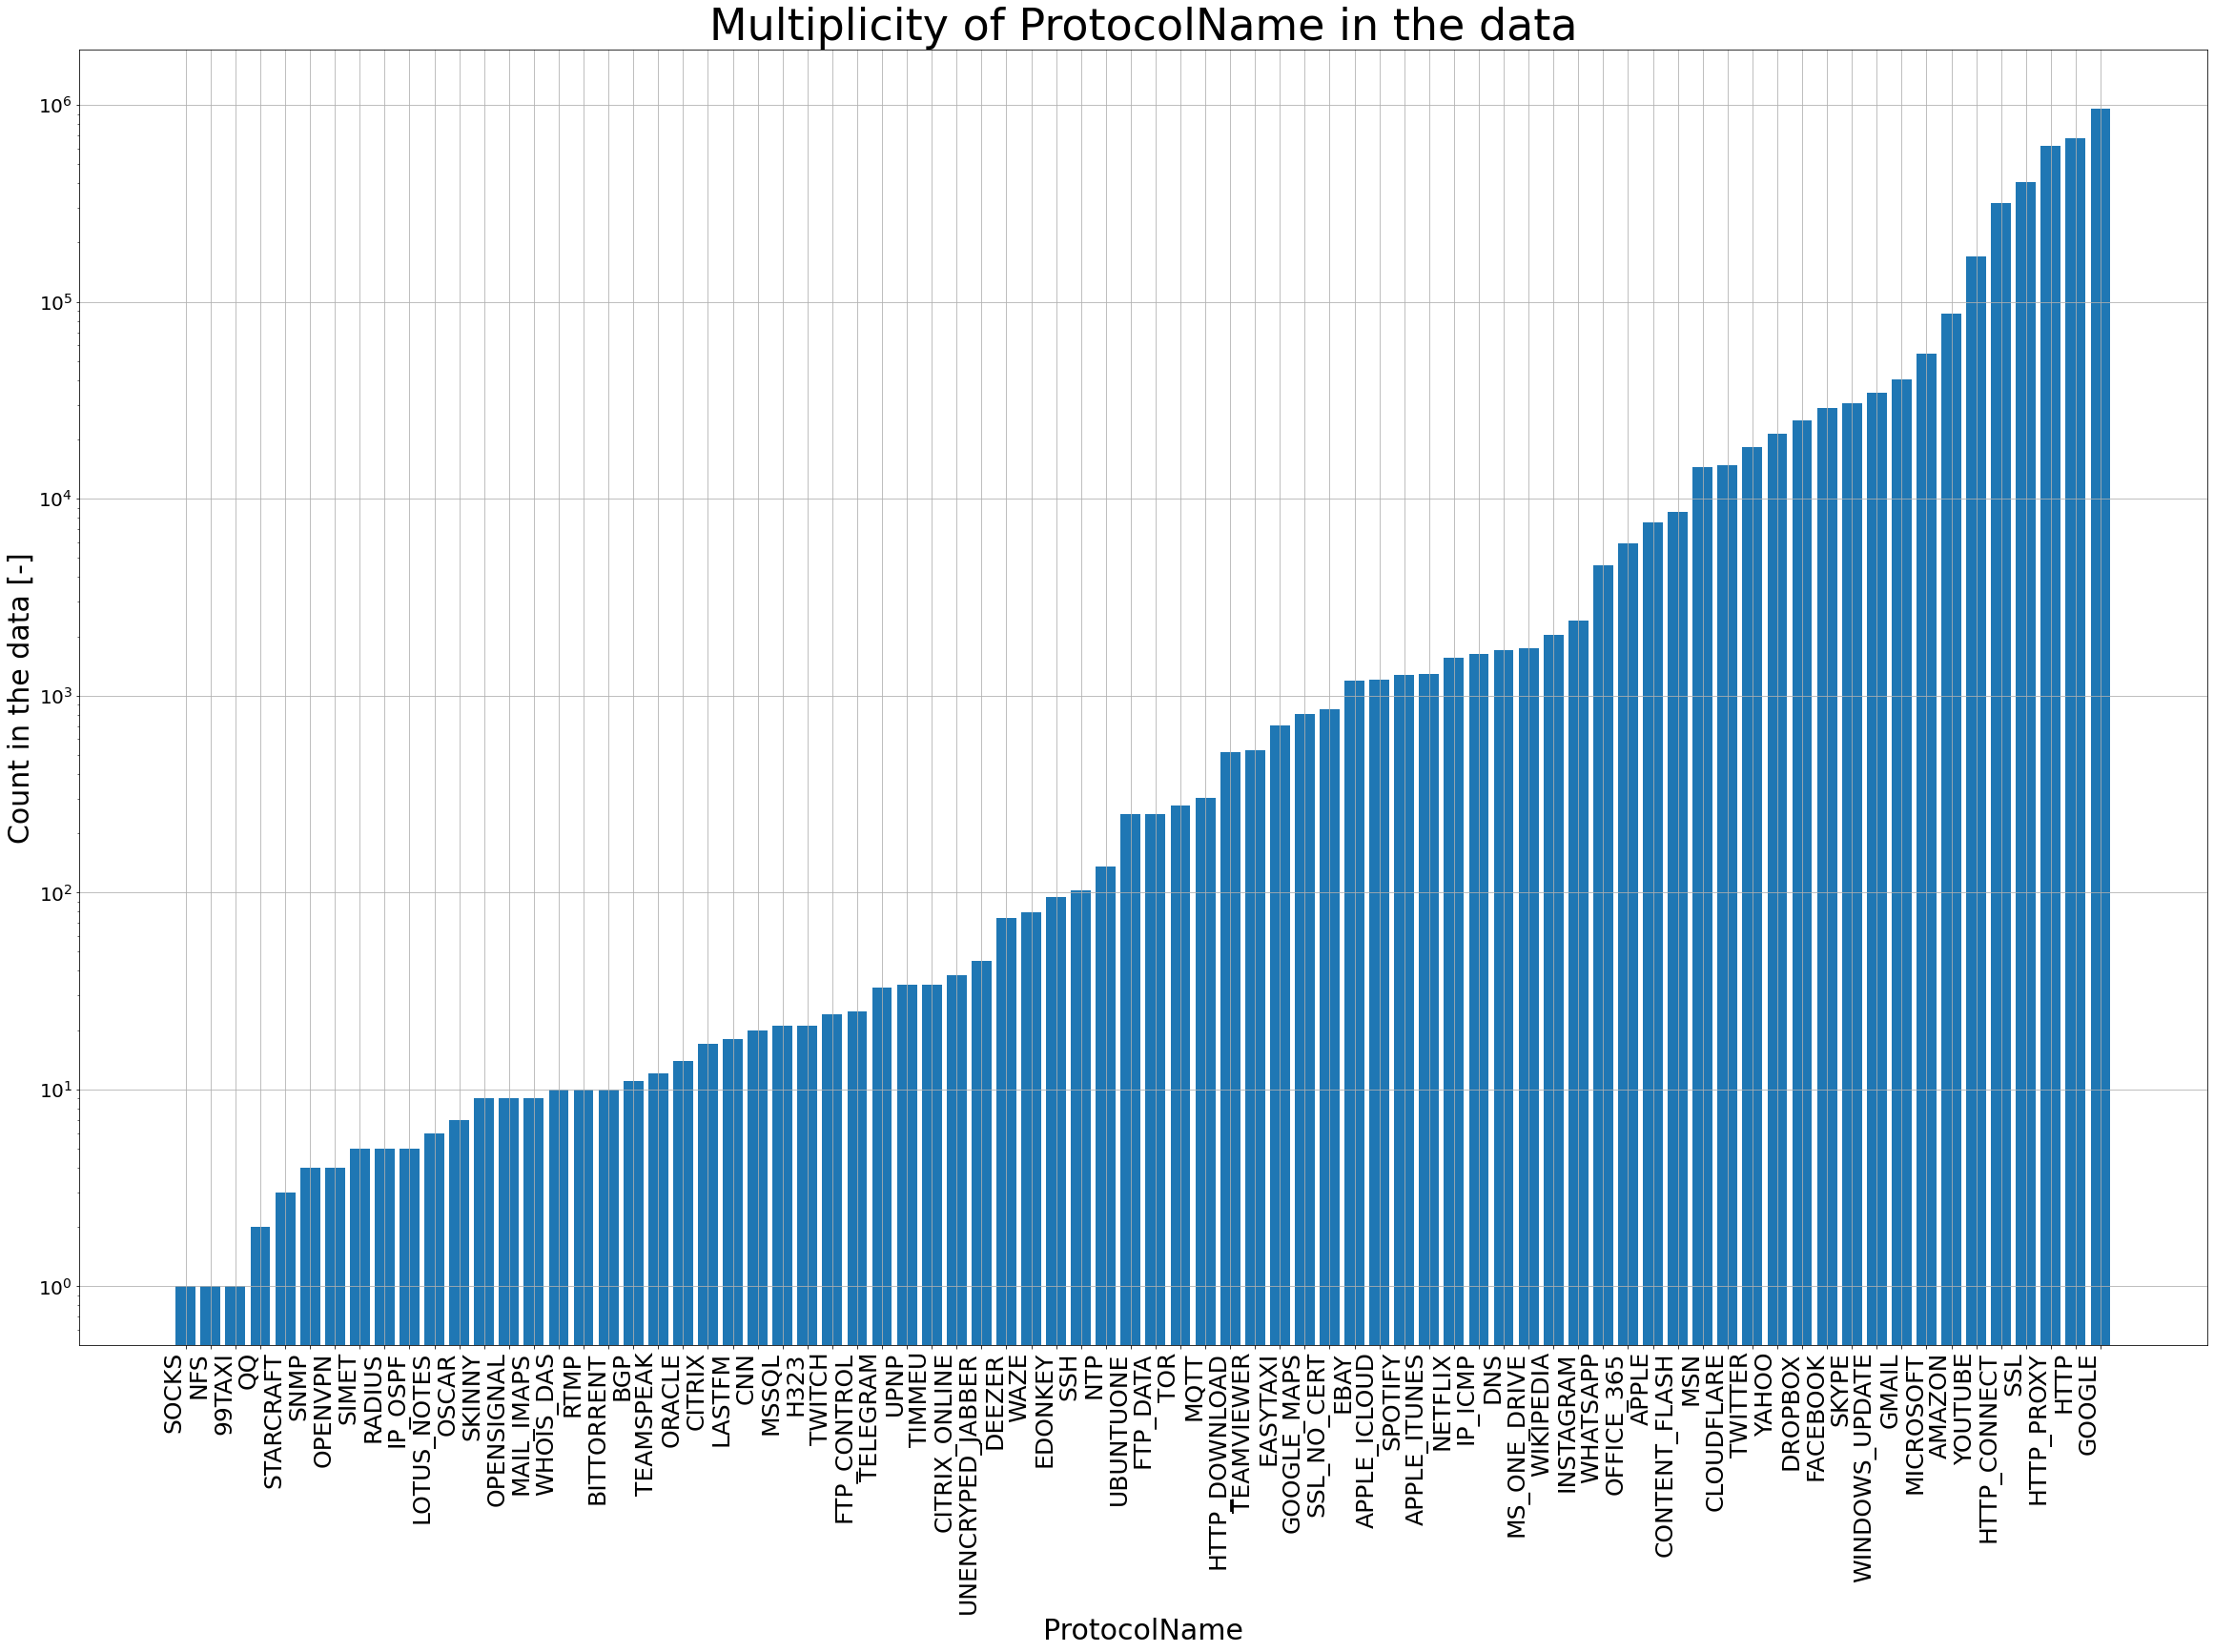

In [25]:
fig, axs = plt.subplots(1, 1, figsize=(40, 25))
axs.bar(Protocol_stats[0], Protocol_stats[1].astype('float'))
labels = axs.get_xticklabels()
labelsy = axs.get_yticklabels()
plt.setp(labels, rotation=90, horizontalalignment='right', fontsize=25)
plt.setp(labelsy, fontsize=20)
axs.set_title('Multiplicity of ProtocolName in the data', fontsize=46)
axs.set_xlabel('ProtocolName', fontsize=30)
axs.set_ylabel('Count in the data [-]', fontsize=30)
axs.set_yscale('log')
axs.grid()
plt.savefig('ProtocolName_counts.png')
plt.show()


If we plot the data in percentages and not with counts, we can come to the conclusion, that the Top10 `ProtocolName` covers almost 95% of the data.

In [26]:
proportion_top10 = Protocol_stats[1].astype('float')[-10:].sum()/len(df['ProtocolName'])*100
print(str(proportion_top10) + "% of the data is covered by the top10 ProtocolName")

94.34857355472673% of the data is covered by the top10 ProtocolName


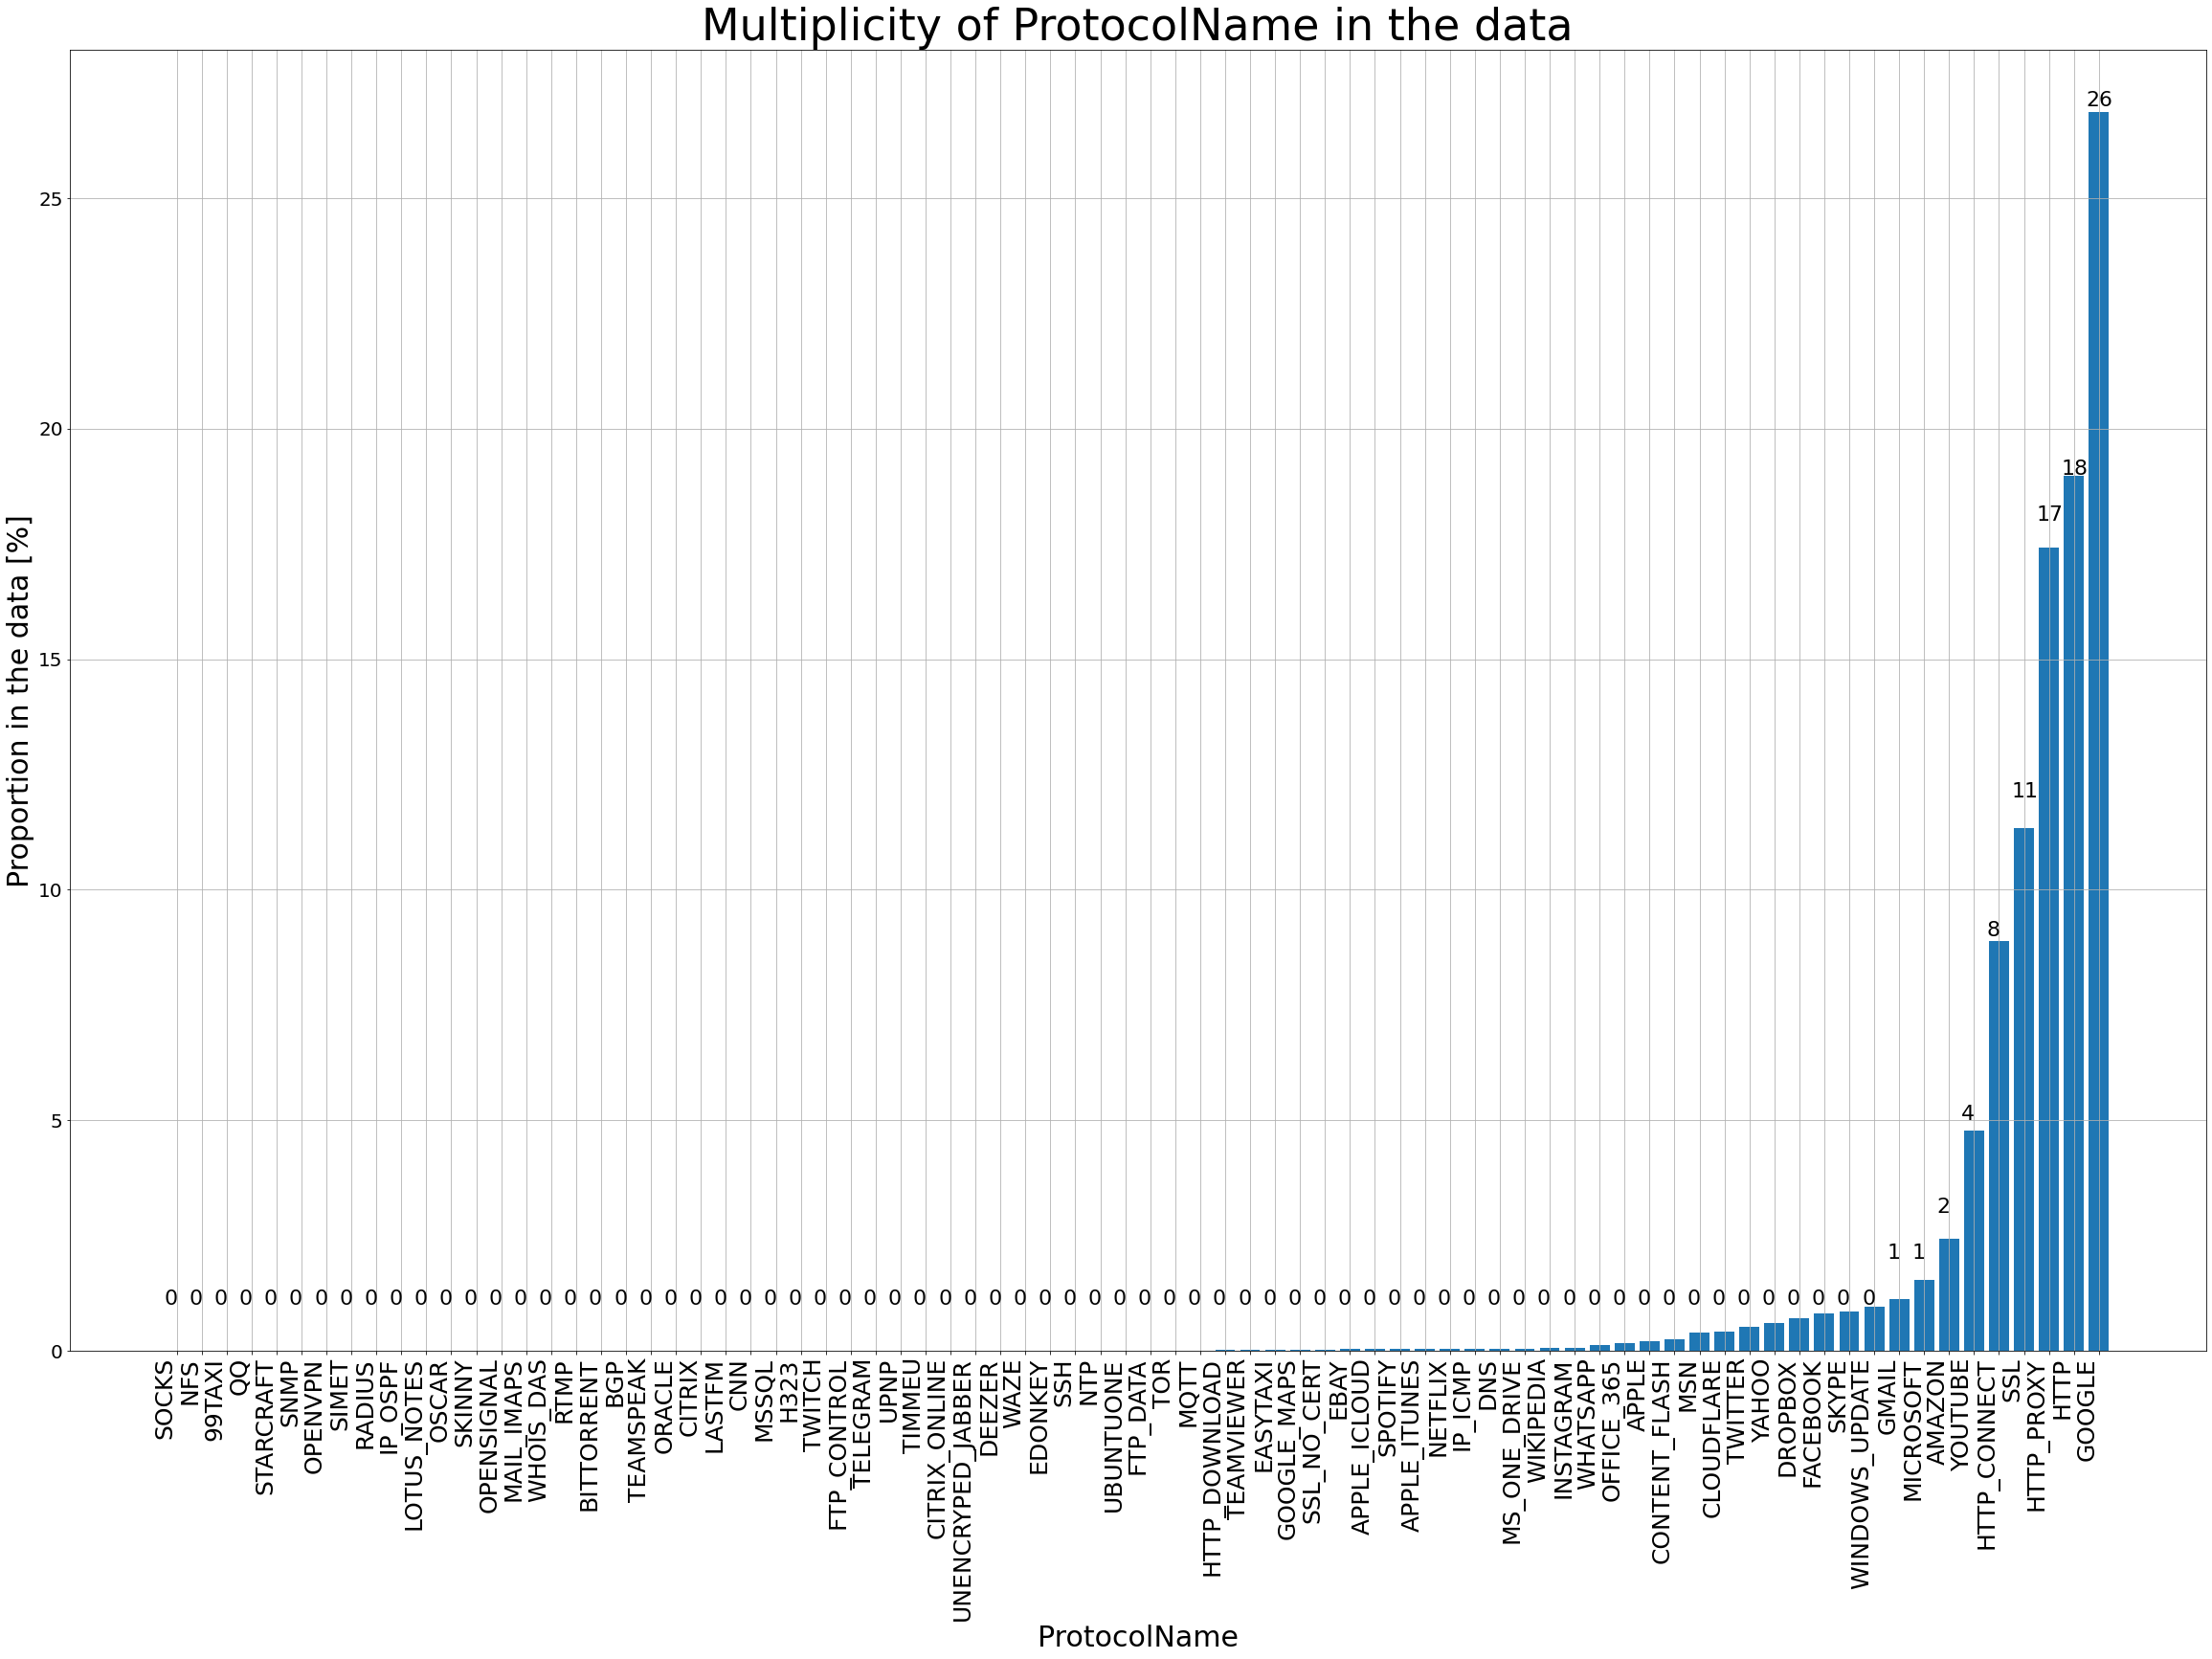

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(40, 25))
axs.bar(Protocol_stats[0], Protocol_stats[1].astype('float')/len(df['ProtocolName'])*100)
labels = axs.get_xticklabels()
labelsy = axs.get_yticklabels()
plt.setp(labels, rotation=90, horizontalalignment='right', fontsize=25)
plt.setp(labelsy, fontsize=20)
axs.set_title('Multiplicity of ProtocolName in the data', fontsize=46)
axs.set_xlabel('ProtocolName', fontsize=30)
axs.set_ylabel('Proportion in the data [%]', fontsize=30)

cucc = Protocol_stats[1].astype('float')/len(df['ProtocolName'])*100//1
cucc = cucc.astype(int)

for index,data in enumerate(cucc):
    plt.text(x=index-0.5 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=22))

axs.grid()
plt.savefig('ProtocolName_percentage.png')
plt.show()

A textual summary is also created regarding the multiplicity of unique values within the `ProtocolName` target variable:

In [28]:
for i, element in enumerate(Protocol_stats.transpose()):
    print(str(Protocol_stats.transpose()[i][0]) + ": " + str(Protocol_stats.transpose()[i][1]))

SOCKS: 1
NFS: 1
99TAXI: 1
QQ: 2
STARCRAFT: 3
SNMP: 4
OPENVPN: 4
SIMET: 5
RADIUS: 5
IP_OSPF: 5
LOTUS_NOTES: 6
OSCAR: 7
SKINNY: 9
OPENSIGNAL: 9
MAIL_IMAPS: 9
WHOIS_DAS: 10
RTMP: 10
BITTORRENT: 10
BGP: 11
TEAMSPEAK: 12
ORACLE: 14
CITRIX: 17
LASTFM: 18
CNN: 20
MSSQL: 21
H323: 21
TWITCH: 24
FTP_CONTROL: 25
TELEGRAM: 33
UPNP: 34
TIMMEU: 34
CITRIX_ONLINE: 38
UNENCRYPED_JABBER: 45
DEEZER: 74
WAZE: 79
EDONKEY: 95
SSH: 102
NTP: 135
UBUNTUONE: 249
FTP_DATA: 251
TOR: 276
MQTT: 302
HTTP_DOWNLOAD: 516
TEAMVIEWER: 527
EASYTAXI: 705
GOOGLE_MAPS: 807
SSL_NO_CERT: 856
EBAY: 1192
APPLE_ICLOUD: 1200
SPOTIFY: 1269
APPLE_ITUNES: 1286
NETFLIX: 1560
IP_ICMP: 1631
DNS: 1695
MS_ONE_DRIVE: 1748
WIKIPEDIA: 2025
INSTAGRAM: 2415
WHATSAPP: 4593
OFFICE_365: 5940
APPLE: 7614
CONTENT_FLASH: 8589
MSN: 14477
CLOUDFLARE: 14737
TWITTER: 18258
YAHOO: 21267
DROPBOX: 25102
FACEBOOK: 29014
SKYPE: 30654
WINDOWS_UPDATE: 34470
GMAIL: 40260
MICROSOFT: 54706
AMAZON: 86873
YOUTUBE: 170775
HTTP_CONNECT: 317490
SSL: 404822
HTTP_PROXY:

**Basic considerations and remarks:**
- There are 47 classes, which have less than 1000 records, meanwhile the most frequent class (GOOGLE) has almost 1 million records.
- From this perspective, the data is highly imbalanced. This need to be taken care of and addressed during the modelling.

### Connection between L7Protocol and ProtocolName:

By taking a brief look on the data, one might have the conjecture, that ProtocolName and L7Protocol carry the same information. We would make a major mistake in the modelling, if we would use one of them as an input variable to predict the other.

In [29]:
df[["L7Protocol","ProtocolName"]]

,L7Protocol,ProtocolName
0,131,HTTP_PROXY
1,131,HTTP_PROXY
2,7,HTTP
3,7,HTTP
4,131,HTTP_PROXY
...,...,...
3577291,91,SSL
3577292,91,SSL
3577293,91,SSL
3577294,91,SSL


To make sure, that they are indeed identical, we will de the following check:

In [30]:
# Do they have the same amount of unique instances?
print("L7Protocol has " + str(df["L7Protocol"].nunique()) + " unique values.")
print("ProtocolName has " + str(df["ProtocolName"].nunique()) + " unique values.")

L7Protocol has 78 unique values.
ProtocolName has 78 unique values.


**Remark:** In the future, we need to decide, which one we will take as a target variable, and we also need to take care, that the other one is not used during the modelling. **I decided to drop “L7Protocol” and continue with “ProtocolName” as a target variable.**

## Plotting the distribution of various features

C:\Users\AVA2BP\AppData\Local\Temp/ipykernel_20180/1630788283.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(bins = 15, ax = ax)


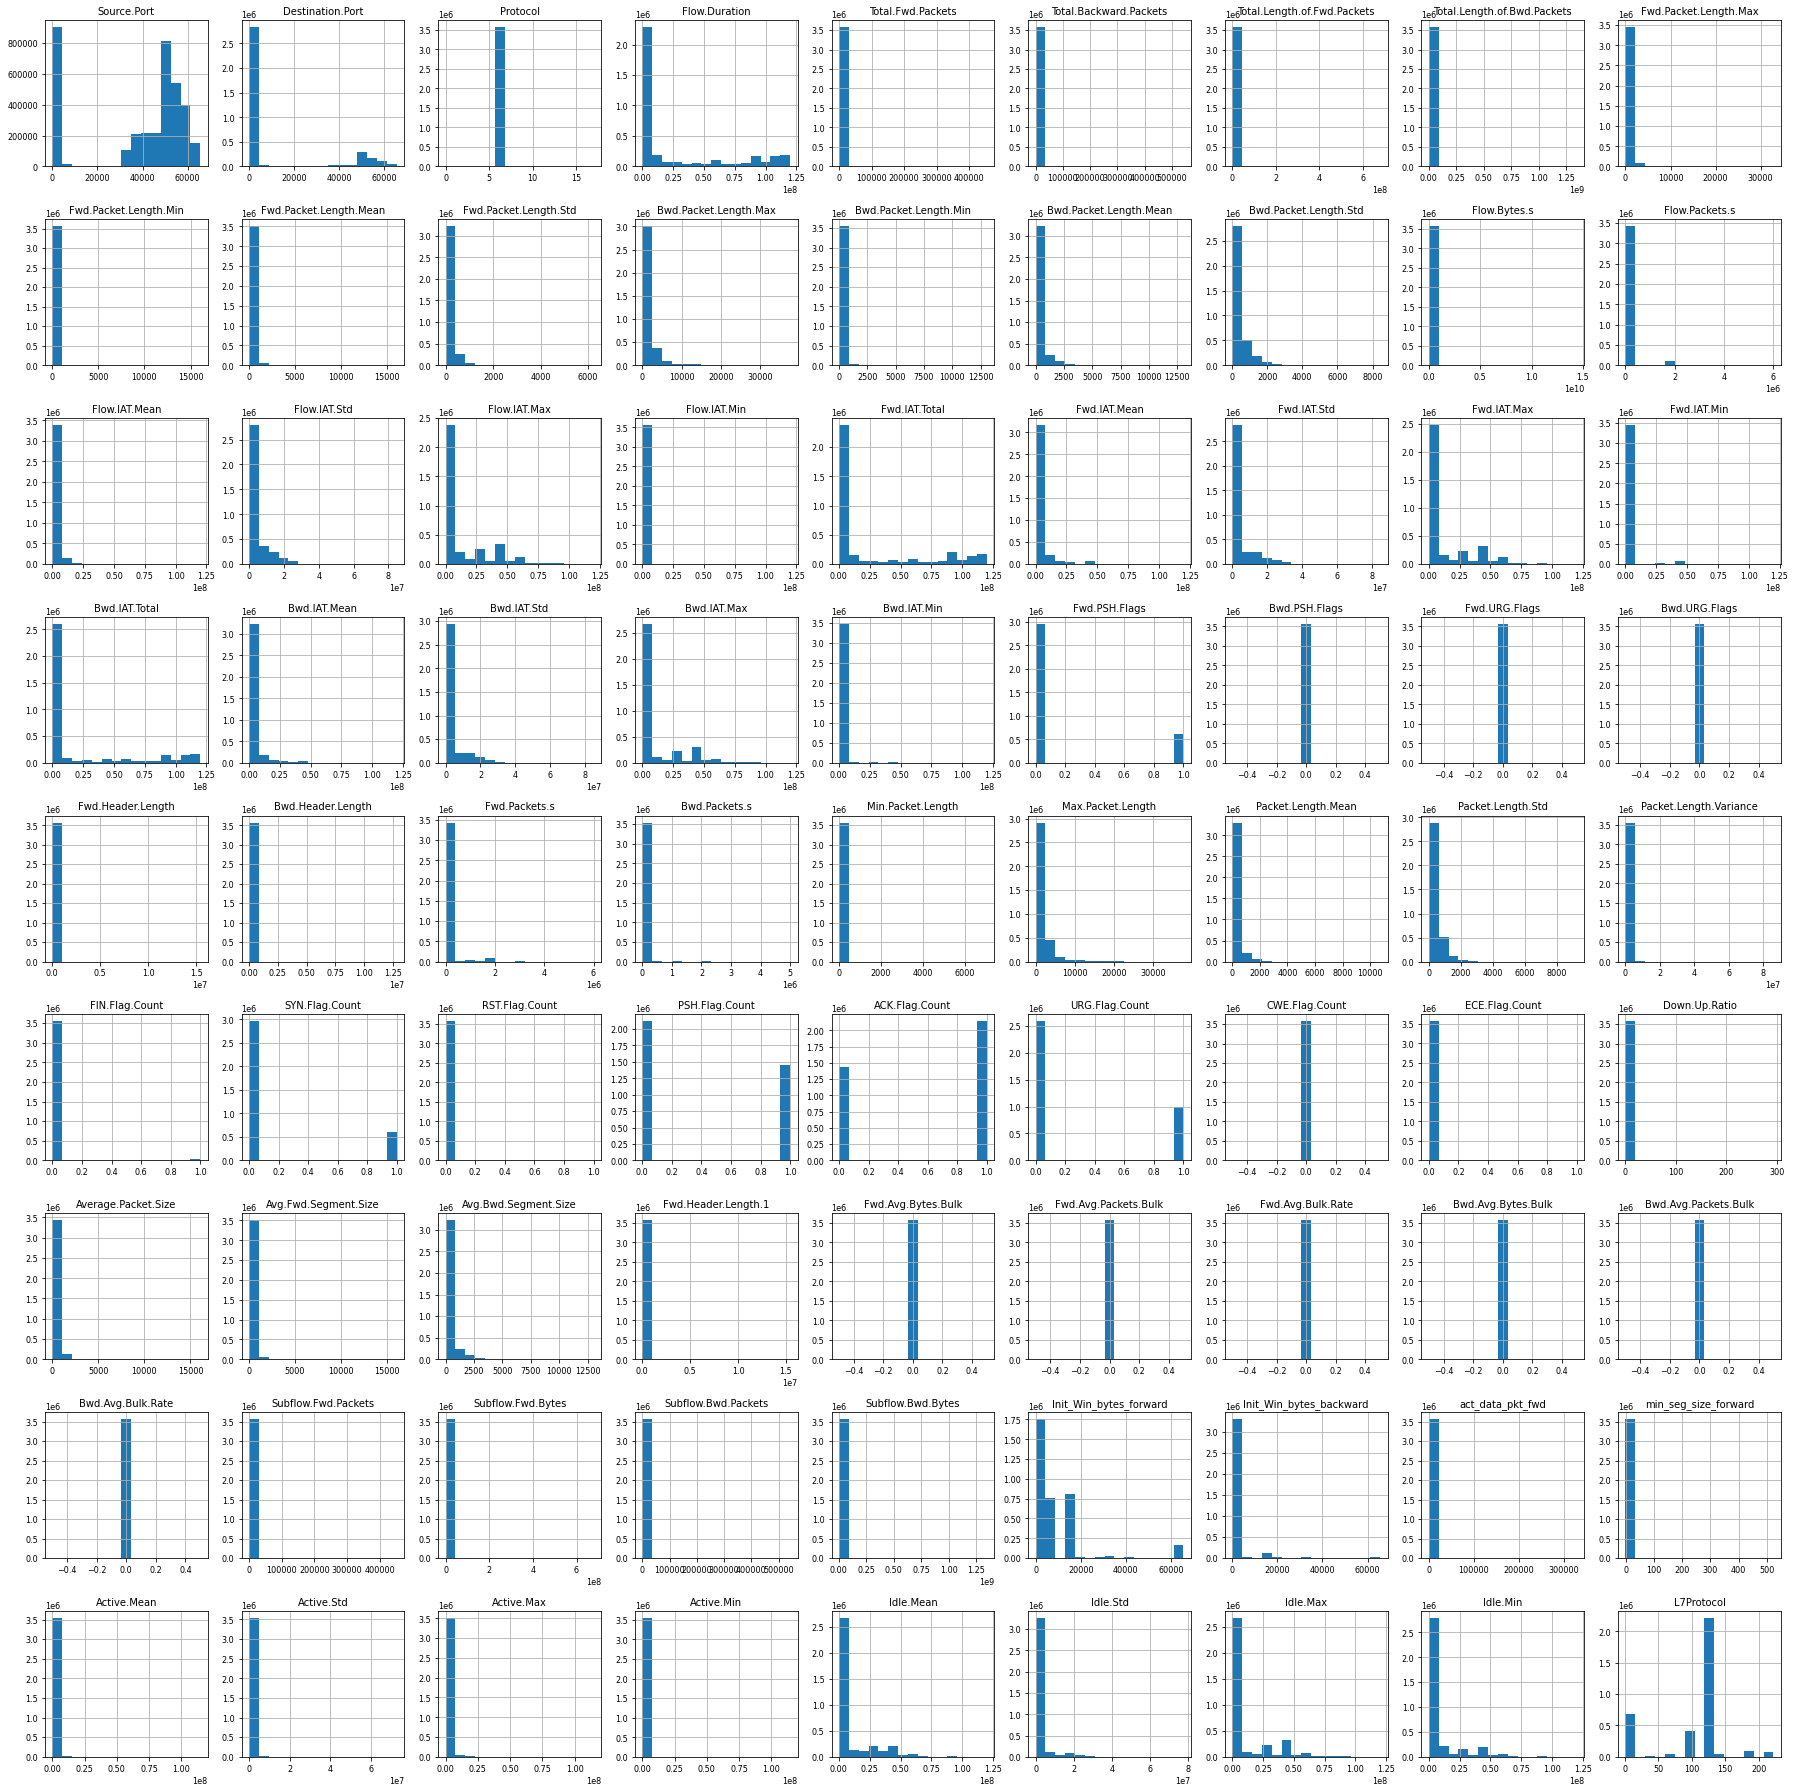

In [31]:
fig, ax = plt.subplots(figsize = (25,25))
params = {'axes.titlesize':'10',
          'xtick.labelsize':'8',
          'ytick.labelsize':'8'}
plt.rcParams.update(params)
df.hist(bins = 15, ax = ax)
plt.tight_layout()
plt.savefig('Histograms_full.png')
plt.show()

**Remark:** This plot does not seem to be helpful at all, we will certainly need to reduce the dimension of this problem later on, so that we can highlight those predictors, which are the most important features in the modelling.

## Correlation matrix

The correlation matrix can be used to identify those features, which are highly correlated. These features more or less carry the same information, meaning they can be considered redundant. By eliminating these features, the complexity of the problem can be reduced.

In [32]:
CorrMatrix = df.corr()

In [33]:
CorrMatrix

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
Source.Port,1.000000,-0.803160,0.026035,-0.055415,-0.026166,0.000598,-0.036330,0.018362,-0.061536,-0.128660,-0.129271,0.028440,0.167857,-0.094824,0.161000,0.208760,-0.065292,-0.113837,-0.003576,0.017076,0.055590,0.017811,-0.064245,0.043847,0.010844,0.046110,0.063101,-0.077418,-0.099224,-0.005897,0.019554,-0.074113,-0.267047,NaN,NaN,NaN,-0.024077,-0.000780,-0.134635,0.031492,-0.071808,0.102976,0.058587,0.135194,0.080915,0.015007,-0.267047,0.016681,0.328010,-0.364244,-0.223322,NaN,0.017398,0.153885,0.051517,-0.129271,0.161000,-0.024077,NaN,NaN,NaN,NaN,NaN,NaN,-0.026166,-0.036330,0.000598,0.018362,-0.035978,-0.262742,-0.034620,0.047142,-0.016427,-0.024944,-0.027057,-0.007082,0.008695,0.011062,0.006709,0.008641,0.350223
Destination.Port,-0.803160,1.000000,-0.006312,0.100455,0.029490,0.001273,0.041060,-0.018378,0.059707,0.138279,0.140209,-0.040221,-0.196628,0.095339,-0.191408,-0.248389,0.074110,0.123561,0.045150,0.023257,-0.028356,-0.015609,0.109379,0.004891,0.013316,-0.015044,-0.024514,0.122202,0.142237,0.040582,0.016527,0.100678,0.265323,NaN,NaN,NaN,0.025949,0.000954,0.150508,-0.048663,0.081489,-0.124919,-0.070615,-0.164771,-0.104767,-0.011191,0.265323,-0.010274,-0.359759,0.404286,0.223410,NaN,-0.011118,-0.142301,-0.062975,0.140209,-0.191408,0.025949,NaN,NaN,NaN,NaN,NaN,NaN,0.029490,0.041060,0.001273,-0.018378,-0.247889,0.083891,0.040163,-0.193114,0.018934,0.033801,0.032762,0.005943,0.035181,0.015696,0.037693,0.029729,-0.356827
Protocol,0.026035,-0.006312,1.000000,0.045320,0.022838,0.015325,0.000183,0.000340,-0.006237,0.006767,-0.003452,-0.009723,-0.004552,0.008367,-0.003006,-0.007582,-0.000743,-0.003969,-0.003955,-0.006107,-0.005256,-0.000535,0.046381,-0.004530,-0.005286,-0.004577,-0.002522,0.048336,-0.004124,-0.005264,-0.003914,-0.001937,-0.007664,NaN,NaN,NaN,0.021302,0.014564,-0.003395,-0.003205,0.015690,-0.005771,-0.004790,-0.008940,-0.006385,-0.001419,-0.007664,-0.000435,-0.013942,-0.020565,-0.010411,NaN,-0.000432,-0.013356,-0.004952,-0.003452,-0.003006,0.021302,NaN,NaN,NaN,NaN,NaN,NaN,0.022838,0.000183,0.015325,0.000340,-0.010743,-0.004649,0.025940,0.014596,0.062845,0.010715,0.049448,0.065860,-0.006113,-0.002561,-0.005917,-0.005614,-0.021795
Flow.Duration,-0.055415,0.100455,0.045320,1.000000,0.084768,0.080301,0.047728,0.049474,0.202635,0.068763,0.187524,0.143529,0.104103,0.091379,0.059744,0.043370,-0.030846,-0.136966,0.523524,0.712055,0.804397,0.006010,0.985159,0.531207,0.671308,0.799846,0.240580,0.928452,0.498508,0.655177,0.770994,0.205809,0.463852,NaN,NaN,NaN,0.080364,0.078053,-0.129410,-0.070027,0.000101,0.157336,0.124219,0.113659,0.056786,-0.053091,0.463852,0.003748,-0.110006,0.111575,-0.385793,NaN,0.003665,0

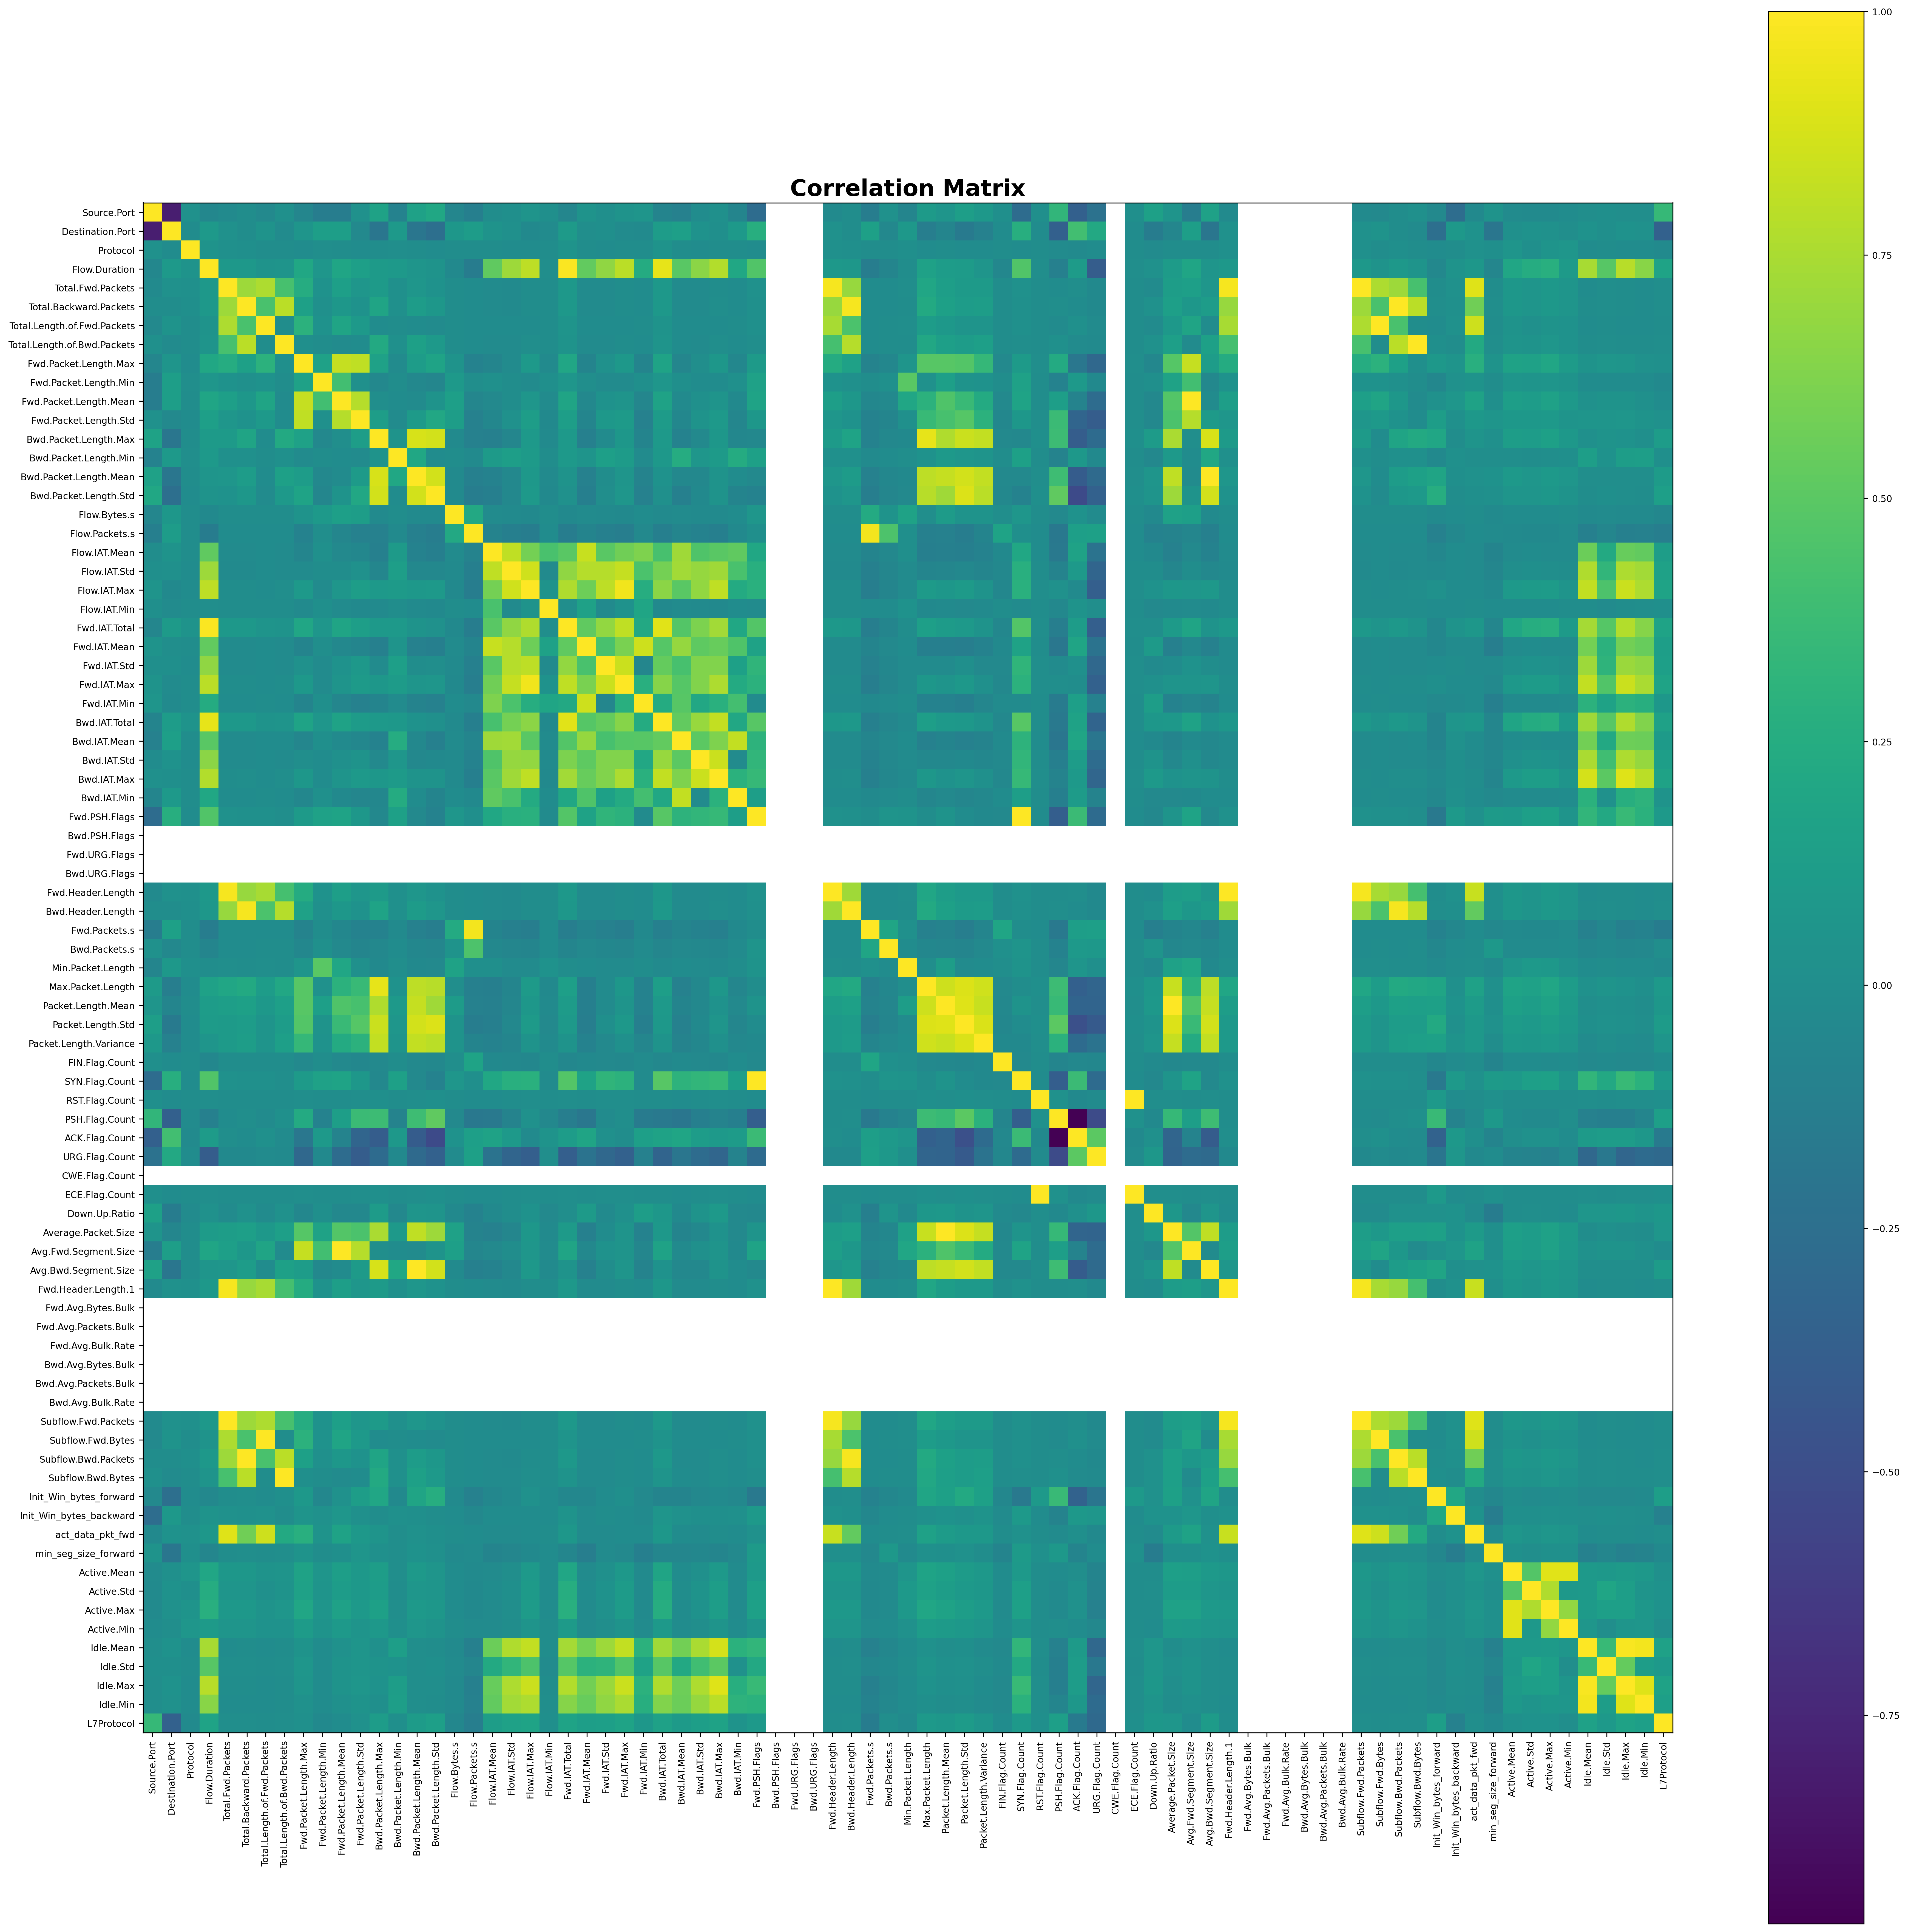

In [34]:
plt.figure(num=None, figsize=(30, 30), dpi=300, facecolor='w', edgecolor='k')
corrMat = plt.matshow(CorrMatrix, fignum = 1)
plt.xticks(range(len(CorrMatrix.columns)), CorrMatrix.columns, rotation=90)
plt.yticks(range(len(CorrMatrix.columns)), CorrMatrix.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title('Correlation Matrix', fontsize=20, fontweight = 'bold')
plt.savefig('CorrelationMatrix.png')

In [35]:
c = CorrMatrix.abs()

In [36]:
# Sorting the correlation values in a descending order:
# Inspiration for this algorithm:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

# We remove the upper traingle and the diagonal of the correlation matrix to get rid of duplicates the '1'-s, which are
# coming from the variable's self correlation
pairs_to_drop = set()
cols = c.columns
for i in range(0, c.shape[1]):
    for j in range(0, i+1):
        pairs_to_drop.add((cols[i], cols[j]))
        
au_corr = c.abs().unstack()
au_corr = au_corr.drop(labels=pairs_to_drop).sort_values(ascending=False)

In [37]:
# Top 40 correlated variable pairs
au_corr[0:40]

Bwd.Packet.Length.Mean       Avg.Bwd.Segment.Size      1.000000
Total.Length.of.Bwd.Packets  Subflow.Bwd.Bytes         1.000000
Total.Backward.Packets       Subflow.Bwd.Packets       1.000000
Fwd.PSH.Flags                SYN.Flag.Count            1.000000
Total.Length.of.Fwd.Packets  Subflow.Fwd.Bytes         1.000000
Total.Fwd.Packets            Subflow.Fwd.Packets       1.000000
Fwd.Header.Length            Fwd.Header.Length.1       1.000000
Fwd.Packet.Length.Mean       Avg.Fwd.Segment.Size      1.000000
Packet.Length.Mean           Average.Packet.Size       0.996526
RST.Flag.Count               ECE.Flag.Count            0.992407
Flow.Duration                Fwd.IAT.Total             0.985159
Idle.Mean                    Idle.Max                  0.977260
Total.Backward.Packets       Bwd.Header.Length         0.975858
Bwd.Header.Length            Subflow.Bwd.Packets       0.975858
Total.Fwd.Packets            Fwd.Header.Length         0.973897
                             Fwd.Header.

It is visible from the plot, that there are highly correlated variables. During the data preparation and modelling, we will get rid of some of these features, to reduce the complexity of the issue.

**Remark:** As a basic consideration it can be already stated, that it is not advisable to drop too much features, since the tree-based methods will take care of getting rid of useless variables. Moreover, there is a chance, that we delete a feature, which is highly correlated with another one, but in the meanwhile might carry some key information. Therefore I decided to drop one column from those pairs, where the correlation equals to 1. 

# Data preparation

During the data understanding, a preliminary data cleaning and preparation was already performed:
- Check for missing values (there wasn’t any)
- Duplicates were removed

In this step, we will structure, organize and transform the data in a way, that it is possible to build a model from it.

### Reduction of the problem's dimension

In this step we will get rid of some features, that most likely do not add any value to the model.

In [38]:
# Take a look on the data
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,110414.0,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698.0,41178.0,762.555556,1230.348220,5133.0,1.0,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0.0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,0.0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0.0,107.0,53.500000,75.660426,107.0,0.0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0.0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


#### Check the `Flow.ID`:

In [39]:
len(df["Flow.ID"].unique())

1522917

In [40]:
df["Flow.ID"].value_counts().values

array([393, 388, 383, ...,   1,   1,   1], dtype=int64)

`Flow.ID` - as its name suggests -, is an ID type variable, and therefore has ~1.5 million unique values. As a result, it is advisable to disregard that during the modelling, since this is too unique. Otherwise, we would risk that model will be overfitted, which would result in a very good train, but in a poor test performance.

In [41]:
len(df["Destination.IP"].unique())

22824

#### Check the `Label`:

In [42]:
df.Label.value_counts()

BENIGN    3569152
Name: Label, dtype: int64

`Label` is identical for all records, therefore it does not make any sense to take into account during the modelling.

**In summary we will get rid of the following features:**
- `Flow.ID`, since it is has too many unique values.
- `Label` is identical for all records, therefore it does not add any value to the model
- Those variables can also be disregarded, which are highly correlated with other variables (corr == 1): `Avg.Bwd.Segment.Size`, `Subflow.Bwd.Bytes`, `Subflow.Bwd.Packets`, `SYN.Flag.Count`, `Subflow.Fwd.Bytes`, `Subflow.Fwd.Packets`, `Fwd.Header.Length.1`, `Avg.Fwd.Segment.Size`
- `L7Protocol` must be removed as well, since it is the numerical representation of the ProtocolName (as it was proved earlier). If we did not remove that, we would inject the target variable to the model, and might get nonsense results.

In [43]:
#First, let's make a copy of the original dataframe in case we need it in the future
df_orig = df

In [44]:
# Drop the above listed variables
vars2drop = ["Flow.ID", "L7Protocol", "Timestamp", "Avg.Bwd.Segment.Size", "Subflow.Bwd.Bytes", "Subflow.Bwd.Packets",
             "SYN.Flag.Count", "Subflow.Fwd.Bytes", "Subflow.Fwd.Packets", "Fwd.Header.Length.1", "Avg.Fwd.Segment.Size", "Label"]
df.drop(vars2drop, axis = 1, inplace = True)

### Encoding of the categorical or non-numerical variables

Most of the machine learning algorithms cannot handle categorical variables unless we convert them to numerical values. However, decision tree can directly learn from such data. Hence, they require all input variables and output variables to be numeric. This means that categorical data must be converted to a numerical form. Many algorithm’s performances highly vary based on how categorical variables are encoded, therefore we need to take special care when encoding the categorical data. Furthermore, we will try different encoding techniques to check, what is the effect of them on the models' performance.

There are two types of categorical variable, nominal and ordinal. A nominal variable has no intrinsic ordering to its categories.

There are lots of encoding methods, one can choose from, including but not limited to:
- One hot encoding
- Label encoding /ordinal encoding
- Dummy encoding
- Target encoding
- Binary encoding
- BaseN encoding
- Hash encoding

In [45]:
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,ProtocolName
0,172.19.1.46,52422,10.200.7.7,3128,6,45523,22,55,132,110414.0,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698.0,41178.0,762.555556,1230.348220,5133.0,1.0,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,1,0,0,0,2,1435.74026,0,0,0,0,0,0,256,490,21,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HTTP_PROXY
1,10.200.7.7,3128,172.19.1.46,52422,6,1,2,0,12,0.0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,1,1,0,0,0,9.00000,0,0,0,0,0,0,490,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HTTP_PROXY
2,50.31.185.39,80,10.200.7.217,38848,6,1,3,0,674,0.0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,0,0,1,0,0,0,0,337.00000,0,0,0,0,0,0,888,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HTTP
3,50.31.185.39,80,10.200.7.217,38848,6,217,1,3,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0.0,107.0,53.500000,75.660426,107.0,0.0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,1,1,0,0,3,0.00000,0,0,0,0,0,0,888,490,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HTTP
4,192.168.72.43,55961,10.200.7.7,3128,6,78068,5,0,1076,0.0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,0,0,1,0,0,0,0,321.00000,0,0,0,0,0,0,253,-1,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HTTP_PROXY


By taking a look on the data, we can come to the conclusion, that all of those variables, that we consider categorical, are rather nominal variables, meaning, that there is no intrinsic order to its categories. Therefore, we need to try out such encoding methods as well, which do not assign a specific order to the endoded cetegories.

Additionally, as it can be seen below, some of these features have many unique values. Consequently we need to use such encoding, that does not result in a lot of dummy variables, which increases the dimension of the data significantly. Due to this, e.g. one hot encoding cannot be used, but we will try-out three different encoding technique. All of them has their own pros and cons.

In [46]:
print("Source.IP has", len(df["Source.IP"].unique()), "unqiue values.")
print("Destination.IP has", len(df["Destination.IP"].unique()), "unqiue values.")
print("Source.Port has", len(df["Source.Port"].unique()), "unqiue values.")
print("Destination.Port has", len(df["Destination.Port"].unique()), "unqiue values.")
print("Protocol has", len(df["Protocol"].unique()), "unqiue values.")

Source.IP has 6566 unqiue values.
Destination.IP has 22824 unqiue values.
Source.Port has 40519 unqiue values.
Destination.Port has 34811 unqiue values.
Protocol has 3 unqiue values.


In [47]:
df = df_orig

#### Three different encoding techniques were tested within this project:

**1) Label/Ordinal encoding:**
- One of the most common encoding methods.
- An encoding method that converts categorical data into numbers.
- The simple idea is to convert the same category to a number with the same value. So the range of numbers maps from 0 to n-1 as labels.
- The disadvantage is that the labels are ordered randomly (in the existing order of the data), which can add noise while assigning an unexpected order between labels. In other words, the data becomes ordinary (ordinal, ordered) data, which can lead to unintended consequences.
- The main advantage is, that new dummy variables will not be generated, however there is a risk, that the features, which become ordinal with this transformation deteriorate the performance of the model, since it might learn some relationships, which are not present in the reality.

**2) Binary encoding:**
- In this encoding scheme, the categorical feature is first converted into numerical using an ordinal encoder.
- Then the numbers are transformed in the binary number.
- After that binary value is split into different columns.
- Binary encoding works really well when there are a high number of categories. For example the cities in a country where a company supplies its products.
- Binary encoding is a memory-efficient encoding scheme as it uses fewer features than one-hot encoding. Further, It reduces the curse of dimensionality for data with high cardinality.
- However, we need to keep in mind, that in our specific case, if we would like to encode all our categorical data, we will end up having 62 extra dummy variables, which increases the the dimension of the problem siginificantly:
    - `Source.IP` requires 13 columns for binary encoding
    - `Destination.IP` requires 15 columns for binary encoding
    - `Source.Port` requires 16 columns for binary encoding
    - `Destination.Port` requires 16 columns for binary encoding
    - `Protocol` requires 2 columns for binary encoding
    - Which gives us 62 extra columns in total

**3) BaseN encoding:**
- For Binary encoding, the Base is 2 which means it converts the numerical values of a category into its respective Binary form.
- In the case when categories are more and binary encoding is not able to handle the dimensionality then we can use a larger base such as 4, 5 , 8, etc.
- In our specific case, I decided to choose N to be 5 (Base5 encoding).
- With this approach, we would only end up having 28 extra columns, which is 34 less compared to binary encoding.

**At the end, we will assess and compare, what is the effect of the used encoding technique on the performance of our machine learning models.**

In [48]:
# Here we define the three used encoding techniques and we can choose, which one we want to use currently:

#selected_encoding = "binary"
#selected_encoding = "ordinal"
selected_encoding = "baseN" 

if selected_encoding == "ordinal":
    encoder= ce.OrdinalEncoder(cols=['Source.IP', "Destination.IP", "Source.Port", "Destination.Port", "Protocol"], 
                         return_df=True)

elif selected_encoding == "binary":
    # Base of the encoding: set 2 for binary encoding
    n_base = 2
    #Create an object for binary
    encoder= ce.BaseNEncoder(cols=['Source.IP', "Destination.IP", "Source.Port", "Destination.Port", "Protocol"], 
                             return_df=True,base=n_base)
    
elif selected_encoding == "baseN":
    # Base of the encoding
    n_base = 5
    #Create an object for Base N Encoding
    encoder= ce.BaseNEncoder(cols=['Source.IP', "Destination.IP", "Source.Port", "Destination.Port", "Protocol"], 
                             return_df=True,base=n_base)
    
else:
    raise Exception("Incorrect selection of encoder.") 
    

#Fit and Transform Data
df = encoder.fit_transform(df)
df

,Source.IP_0,Source.IP_1,Source.IP_2,Source.IP_3,Source.IP_4,Source.IP_5,Source.Port_0,Source.Port_1,Source.Port_2,Source.Port_3,Source.Port_4,Source.Port_5,Source.Port_6,Destination.IP_0,Destination.IP_1,Destination.IP_2,Destination.IP_3,Destination.IP_4,Destination.IP_5,Destination.IP_6,Destination.Port_0,Destination.Port_1,Destination.Port_2,Destination.Port_3,Destination.Port_4,Destination.Port_5,Destination.Port_6,Protocol_0,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,ProtocolName
0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,45523,22,55,132,110414.0,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2.167762e+03,1.319385e+03,5988.0,698.0,41178.0,7.625556e+02,1.230348e+03,5133.0,1.0,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,1,0,0,0,2,1435.740260,0,0,0,0,0,0,256,490,21,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HTTP_PROXY
1,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,2,1,1,2,0,12,0.0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,1,1,0,0,0,9.000000,0,0,0,0,0,0,490,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HTTP_PROXY
2,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,3,1,1,3,0,674,0.0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,5.000000e-01,7.071068e-01,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,0,0,1,0,0,0,0,337.000000,0,0,0,0,0,0,888,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HTTP
3,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,3,1,217,1,3,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,107.0,5.350000e+01,7.566043e+01,107.0,0.0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,1,1,0,0,3,0.000000,0,0,0,0,0,0,888,490,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HTTP
4,0,0,0,0,0,4,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,78068,5,0,1076,0.0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,1.951700e+04,2.575850e+04,54313.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,0,0,1,0,0,0,0,321.000000,0,0,0,0,0,0,253,-1,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

### Selection of the classes to keep

As we observed earlier, ~95% of the data is covered by the top 10 ProtocolName. This means, that it does not make any sense to take into account all of the other minority classes in the model, since very likely we will get false results for them.
In this step, I will map all other classes to a new class called "OTHER", which are not within the top "n" most frequent classes (including "OTHER").

At first, I decided to keep the top 15 most frequent classes, and to map the remaining 78-15 = 63 classes to a new label called "OTHER". As a result, the objective of our classification task will be to predict these 16 classes (including "OTHER").

In [49]:
# At first approach let's choose n to be 15:
n = 15

A red vertical line marks the Protocol name, where we make the cut. We rename each protocol name to OTHER, 
      which are on the left side of the red dashed line.


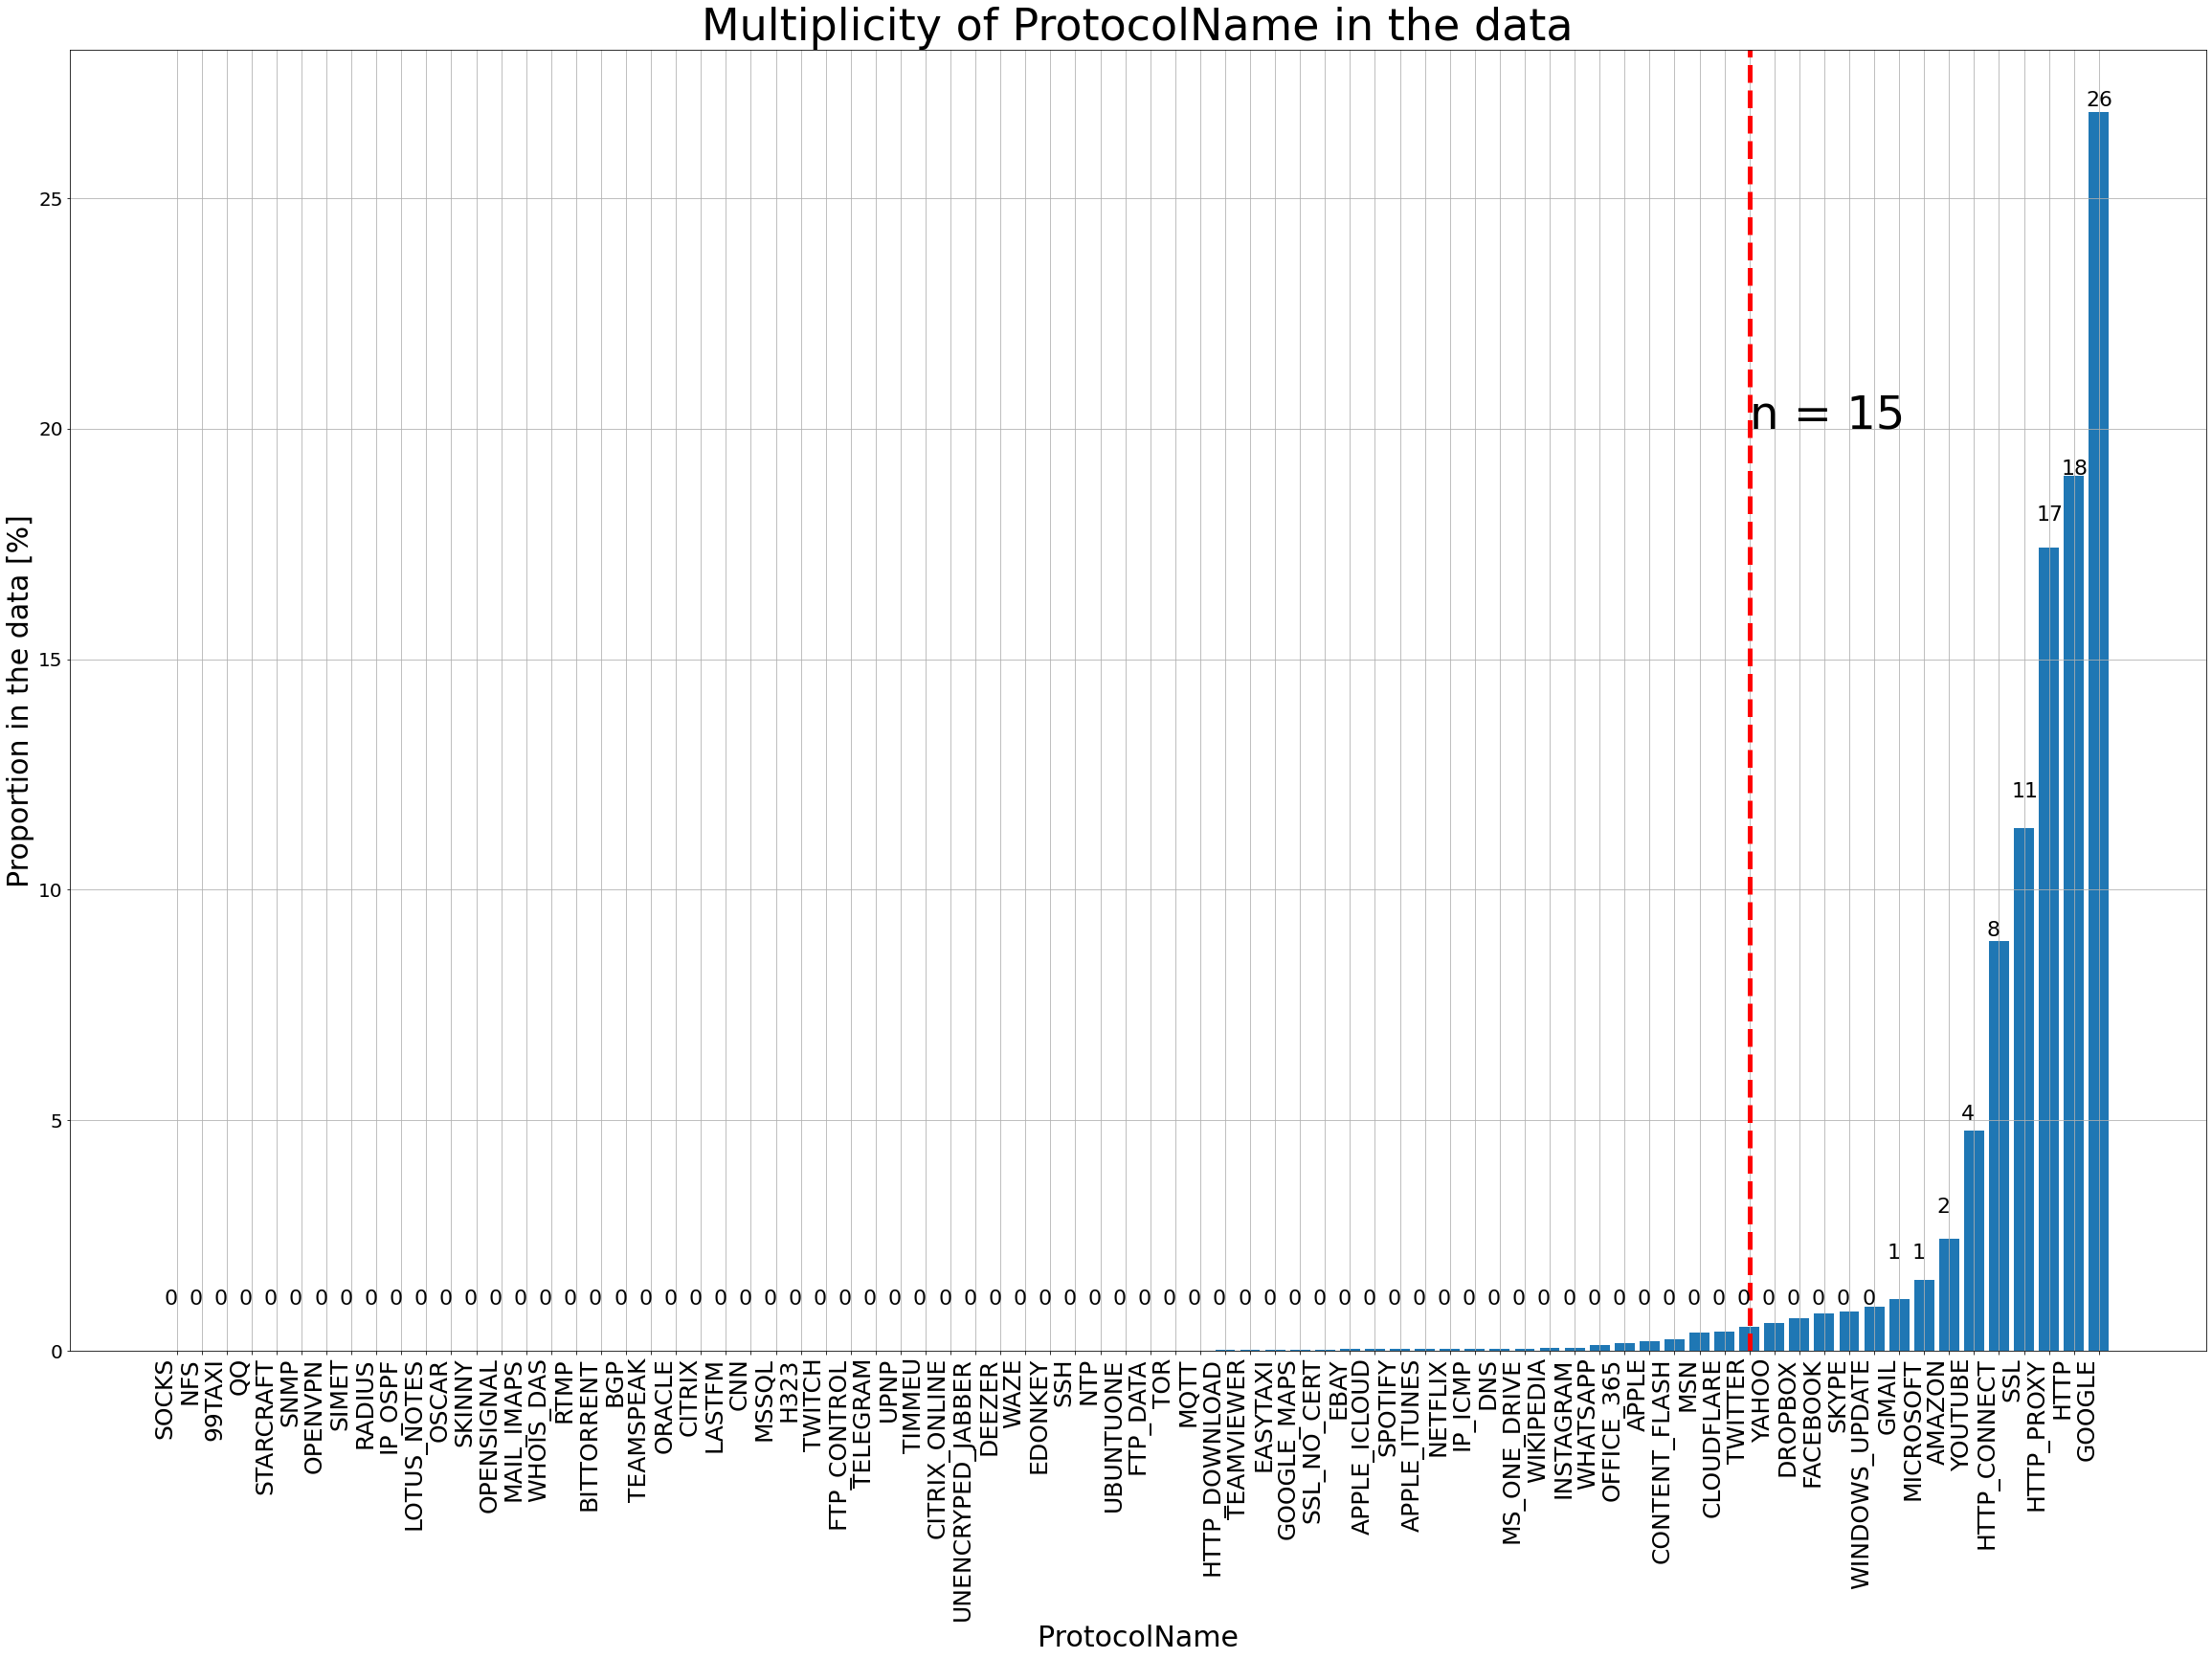

In [50]:
unique, counts = np.unique(df_orig["ProtocolName"], return_counts = True)
Protocol_stats = [unique, counts]

print("""A red vertical line marks the Protocol name, where we make the cut. We rename each protocol name to OTHER, 
      which are on the left side of the red dashed line.""")


Protocol_stats = np.vstack((unique, counts))
Protocol_stats = Protocol_stats.transpose()
Protocol_stats = Protocol_stats.tolist()

def sortFunct(e):
    return e[1]

Protocol_stats.sort(reverse = True, key=sortFunct)
Protocol_stats = np.array(Protocol_stats)
Protocol_stats = Protocol_stats.transpose()
Protocol_stats[0] = Protocol_stats[0][::-1]
Protocol_stats[1] = Protocol_stats[1][::-1]

fig, axs = plt.subplots(1, 1, figsize=(40, 25))
axs.bar(Protocol_stats[0], Protocol_stats[1].astype('float')/len(df['ProtocolName'])*100)
labels = axs.get_xticklabels()
labelsy = axs.get_yticklabels()
plt.setp(labels, rotation=90, horizontalalignment='right', fontsize=25)
plt.setp(labelsy, fontsize=20)
axs.set_title('Multiplicity of ProtocolName in the data', fontsize=46)
axs.set_xlabel('ProtocolName', fontsize=30)
axs.set_ylabel('Proportion in the data [%]', fontsize=30)
axs.axvline(len(unique)-n, color = "r", linestyle = "dashed", linewidth = 5.0)

s= "n = " + str(n)
axs.text(len(unique)-n, 20, s, fontsize=48)


cucc = Protocol_stats[1].astype('float')/len(df['ProtocolName'])*100//1
cucc = cucc.astype(int)

for index,data in enumerate(cucc):
    plt.text(x=index-0.5 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=22))

axs.grid()
plt.savefig('ProtocolName_percentage.png')
plt.show()

In [51]:
classes2keep = Protocol_stats[0][-15:]

print("As a result, the following classes will be kept:")
print(classes2keep)

As a result, the following classes will be kept:
['TWITTER' 'YAHOO' 'DROPBOX' 'FACEBOOK' 'SKYPE' 'WINDOWS_UPDATE' 'GMAIL'
 'MICROSOFT' 'AMAZON' 'YOUTUBE' 'HTTP_CONNECT' 'SSL' 'HTTP_PROXY' 'HTTP'
 'GOOGLE']


In [52]:
for classname in Protocol_stats[0]:
  #print(name)
  if classname not in classes2keep:
    df['ProtocolName'].replace({classname:'OTHER'},inplace=True)

After relabeling the minority classes, ProtocolName has the following unique values:
['AMAZON' 'DROPBOX' 'FACEBOOK' 'GMAIL' 'GOOGLE' 'HTTP' 'HTTP_CONNECT'
 'HTTP_PROXY' 'MICROSOFT' 'OTHER' 'SKYPE' 'SSL' 'TWITTER' 'WINDOWS_UPDATE'
 'YAHOO' 'YOUTUBE']
According to these results, ProtocolName contains 16 applications.


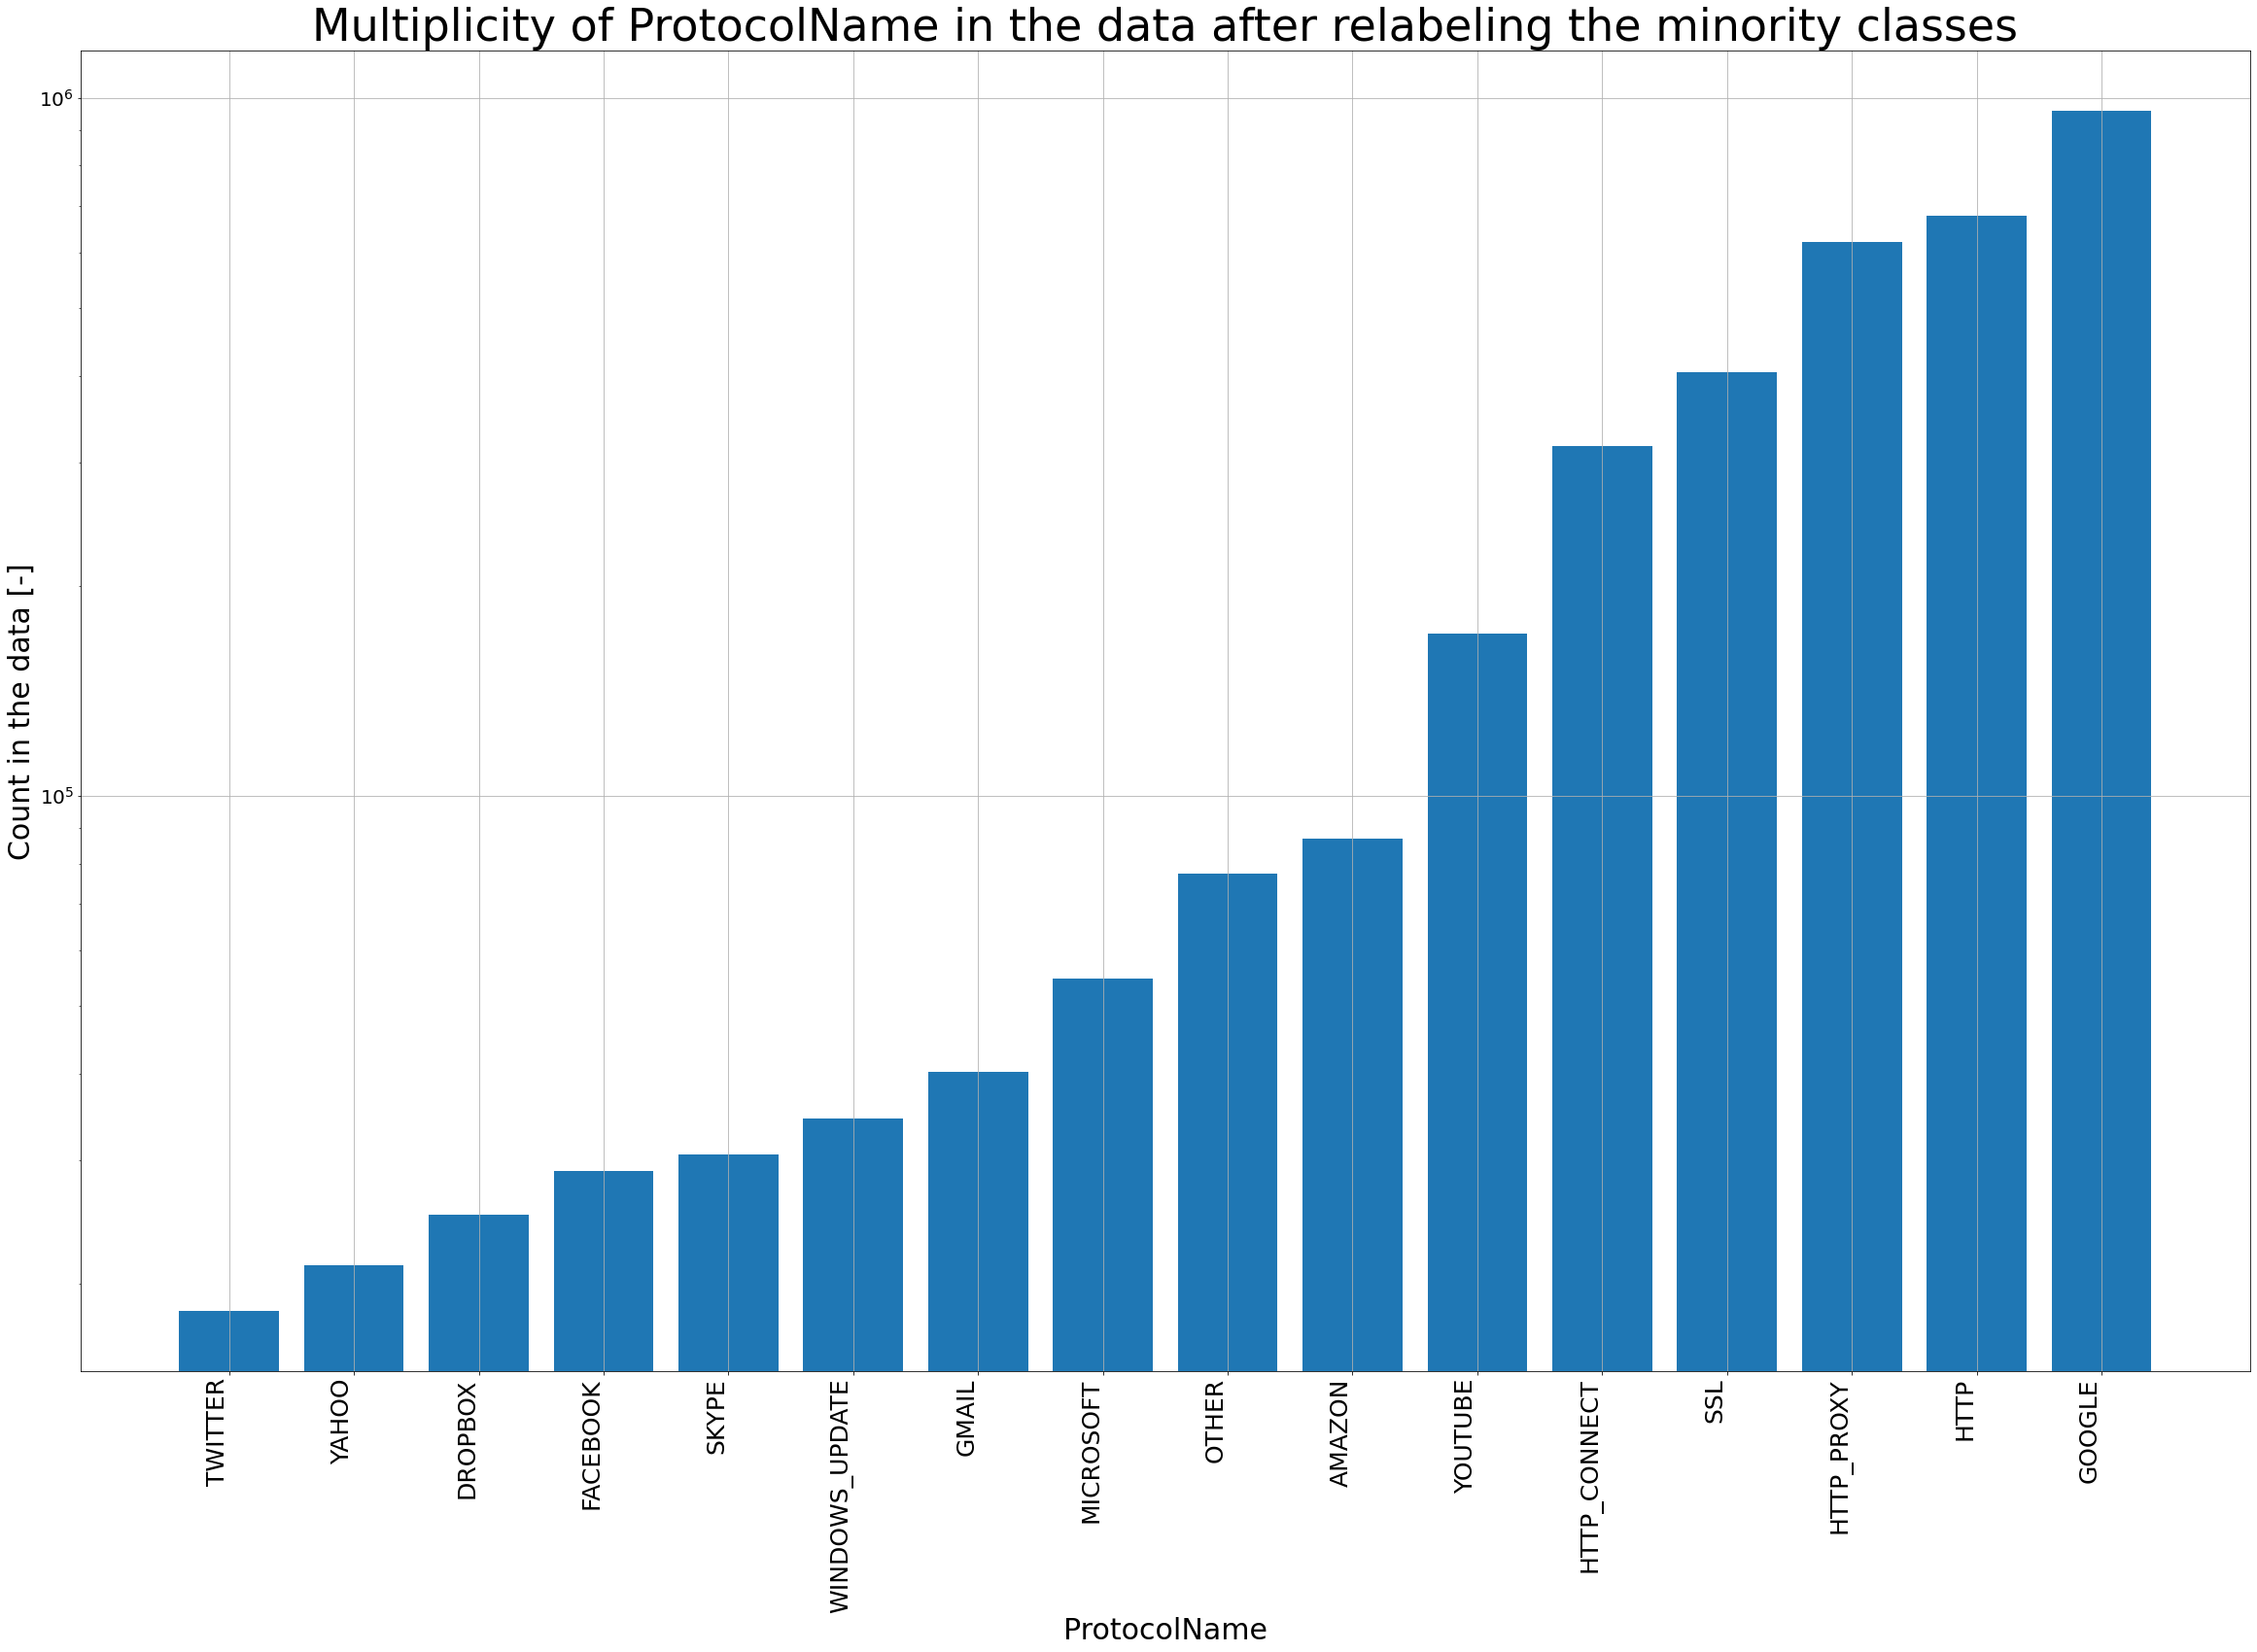

In [53]:
unique, counts = np.unique(df["ProtocolName"], return_counts = True)
Protocol_stats = [unique, counts]

print("After relabeling the minority classes, ProtocolName has the following unique values:")
print(unique)


print("According to these results, ProtocolName contains " + str(len(unique)) + " applications.")

Protocol_stats = np.vstack((unique, counts))
Protocol_stats = Protocol_stats.transpose()
Protocol_stats = Protocol_stats.tolist()

def sortFunct(e):
    return e[1]

Protocol_stats.sort(reverse = True, key=sortFunct)
Protocol_stats = np.array(Protocol_stats)
Protocol_stats = Protocol_stats.transpose()
Protocol_stats[0] = Protocol_stats[0][::-1]
Protocol_stats[1] = Protocol_stats[1][::-1]

fig, axs = plt.subplots(1, 1, figsize=(40, 25))
axs.bar(Protocol_stats[0], Protocol_stats[1].astype('float'))
labels = axs.get_xticklabels()
labelsy = axs.get_yticklabels()
plt.setp(labels, rotation=90, horizontalalignment='right', fontsize=25)
plt.setp(labelsy, fontsize=20)
axs.set_title('Multiplicity of ProtocolName in the data after relabeling the minority classes', fontsize=46)
axs.set_xlabel('ProtocolName', fontsize=30)
axs.set_ylabel('Count in the data [-]', fontsize=30)
axs.set_yscale('log')
axs.grid()
plt.savefig('ProtocolName_counts.png')
plt.show()

The target variable `ProtocolName` shall be encoded, since xgboost only accepts ordinal integer to different categorical levels of categorical variable.

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [55]:
le = preprocessing.LabelEncoder()
df['ProtocolName'] = le.fit_transform(df['ProtocolName'])

In [56]:
df.ProtocolName.unique()

array([ 7,  5,  6, 11,  4, 15,  2,  9,  1, 13,  0,  8,  3, 14, 10, 12])

In [57]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'AMAZON': 0, 'DROPBOX': 1, 'FACEBOOK': 2, 'GMAIL': 3, 'GOOGLE': 4, 'HTTP': 5, 'HTTP_CONNECT': 6, 'HTTP_PROXY': 7, 'MICROSOFT': 8, 'OTHER': 9, 'SKYPE': 10, 'SSL': 11, 'TWITTER': 12, 'WINDOWS_UPDATE': 13, 'YAHOO': 14, 'YOUTUBE': 15}


### Sampling of the dataset

As it was obsereved in the exploratory data analysis, we have two different type of issues, that we need to deal with due to the nature of the data:
- There are ~ 3.5 million records in total, which would require such computational resources for training the model, that is not available for me, meaning that it would not be possible to train the model within a reasonable amount of time (not even mentioning the hyperparameter tuning).
- Furthermore, the target variable is highly imbalanced: there is 5 orders of magnitude difference between the minority and the majority classes. This bias in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely.

These issues lead us to the direction sampling. Sampling is a technique used to adjust the class distribution of a data set. We have three options when sampling the data:
- undersampling
- oversampling
- over-and undersampling

Both oversampling and undersampling involve introducing a bias to select more samples from one class than from another, to compensate for an imbalance that is either already present in the data, or likely to develop if a purely random sample were taken.

A slight improvement was already done on this imbalanced data, when we choose to focus on the top 15 most frequent classes. As a result, considering all challanges, that we need to tackle, I decided to sample the data as follows: two datasets were created with different sample size:

 - A sample consisting of 4000 instances per each class is created first. This gave us 16*4000=64000 records in the limited dataset. In practice, this means that we undersample each classes, since the smallest class (TWITTER) has 18258 records. This smaller sample will be used for basic testing of machine learning algorithms and the hyperparameter-tuning to speed up this process with the limited computational resources, that are available.
 - An extended sample is also established (consisting of 15000 records per each class). This results in 16*15000 = 240000 records in this extended dataset. This will be used at the end to train the final model with the tuned parameters.

Since our smallest class is the "TWITTER" with its 18258 observations, this means an undersampling for both the limited and the extended dataset. There are various different methods for undersampling. **In this project, I've selected the naivest approach, the random undersampling.** Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

**Remarks:**
1) Random resampling is referred to as “naive resampling” method because it assumes nothing about the data and no heuristics are used. This makes them simple to implement and fast to execute, which is desirable for very large and complex datasets, but has some drawbacks as well.

2) Since we randomly resample the data, a huge amount of information is lost from the majority classes. This might lead to the fact, that we unintendidly get rid of some important patterns in the data. However, with the computation resources, that we currently process, this fact needs to be embraced.

3) There are more refined techniques for sampling the data:
   - Undersampling: Tomek's links, near miss undersampling, condensed nearest-neighbor rule undersampling
   - Oversampling: SMOTE, ADASYN, Augmentation
   - Over and undersampling can be combined as well.

The following block of code was generated to prepare the notebook for testing various sampling techniques. At the end, I decided not put this analysis under the scope, therefore I used a very simple algorithm for the random, uniform sampling of each class.

In [58]:
# See details here:
# https://imbalanced-learn.org/stable/auto_examples/api/plot_sampling_strategy_usage.html#sampling-strategy-as-a-dict

# Sample size for each class
#n_sample = 4000
#sampling_strat = {}

#for i in df.ProtocolName.unique():
#    sampling_strat[i] = n_sample

#print(sampling_strat)

#rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=sampling_strat, random_state=42, replacement=False)

In [59]:
# X = df.drop(['ProtocolName'], axis = 1)
# y = df.ProtocolName

In [60]:
# Sample size: extended
# n_sample_ext = 10000
# sampling_strat_ext = {}

#for i in df.ProtocolName.unique():
#    sampling_strat_ext[i] = n_sample_ext
    
#rus_ext = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=sampling_strat_ext, random_state=42, replacement=False)

In [61]:
#X_sampled, y_sampled = rus.fit_resample(X, y)

In [62]:
#X_sampled_ext, y_sampled_ext = rus_ext.fit_resample(X, y)

In [63]:
#X_sampled['ProtocolName'] = y_sampled
#X_sampled_ext['ProtocolName'] = y_sampled_ext
#df_sampled = X_sampled
#df_sampled_ext = X_sampled_ext

In [64]:
# Sample size: limited
n_sample = 4000
df_sampled = df.groupby('ProtocolName').apply(lambda x: x.sample(n_sample, replace=True))
df_sampled = df_sampled.sample(frac=1)

In [65]:
df_sampled

,,Source.IP_0,Source.IP_1,Source.IP_2,Source.IP_3,Source.IP_4,Source.IP_5,Source.Port_0,Source.Port_1,Source.Port_2,Source.Port_3,Source.Port_4,Source.Port_5,Source.Port_6,Destination.IP_0,Destination.IP_1,Destination.IP_2,Destination.IP_3,Destination.IP_4,Destination.IP_5,Destination.IP_6,Destination.Port_0,Destination.Port_1,Destination.Port_2,Destination.Port_3,Destination.Port_4,Destination.Port_5,Destination.Port_6,Protocol_0,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,ProtocolName
ProtocolName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,37268,0,0,4,3,4,0,0,3,1,2,4,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,883784,4,14,18,3039.0,6,0,4.500000,3.000000,603,0,217.071429,298.523151,3458.989979,2.036697e+01,5.198729e+04,1.374824e+05,432113.0,0,883784.0,2.945947e+05,2.574035e+05,483437.0,1401.0,434922.0,3.345554e+04,1.197828e+05,432113.0,0.0,0,0,0,0,92,340,4.525993e+00,15.840975,0,603,160.894737,271.461251,73691.210526,0,0,1,0,0,0,0,3,169.833333,0,0,0,0,0,0,8192,245,3,20,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,5
13,901058,0,0,0,2,0,0,1,3,2,3,3,2,2,0,0,0,2,3,4,2,0,0,0,0,0,4,0,1,1,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,64,0,2.000000e+06,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,1,1,0,0,0,0.000000,0,0,0,0,0,0,3168,-1,0,32,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,13
6,2939081,0,0,4,1,1,3,0,1,2,0,1,2,1,0,0,0,0,0,4,2,0,0,0,0,0,0,1,1,4906,3,5,232,2178.0,226,0,77.333333,128.784057,1460,0,435.600000,648.338492,491235.222177,1.630656e+03,7.008571e+02,9.112104e+02,2583.0,1,2001.0,1.000500e+03,1.067731e+02,1076.0,925.0,4679.0,1.169750e+03,1.280969e+03,2583.0,1.0,0,0,0,0,72,112,6.114961e+02,1019.160212,0,1460,267.777778,504.464513,254484.444444,0,0,1,0,0,0,0,1,301.250000,0,0,0,0,0,0,8192,245,2,20,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,6
14,3477566,0,0,0,1,0,0,0,0,2,0,1,4,0,0,0,1,4,1,0,1,0,0,0,0,0,3,1,1,14121961,10,10,1700,4740.0,537,0,170.000000,247.865107,2896,0,474.000000,888.900569,456.027318,1.416234e+00,7.432611e+05,3.076613e+06,13444812.0,0,14121961.0,1.569107e+06,4.454338e+06,13444812.0,1.0,14121733.0,1.569081e+06,4.468457e+06,13482703.0,68.0,0,0,0,0,328,328,7.081170e-01,0.708117,0,2896,306.666667,641.290054,411252.933333,0,0,1,0,0,0,0,1,322.000000,0,0,0,0,0,0,14600,18,4,32,555111.000000,0.000000,555111.0,555111.0,13444812.0,0.000000,13444812.0,13444812.0,14
11,1589471,0,0,0,2,0,0,0,1,4,4,4,4,0,0,0,0,2,3,2,1,0,0,0,0,0,3,1,1,93053115,24,16,4992,7822.0,624,0,208.000000,300.483089,813,233,488.875000,265.828736,137.706298,4.298620e-01,2.385977e+06,8.349921e+06,30960522.0,0,93053115.0,4.045788e+06,1.064927e+07,30960522.0,0.0,92990991.0,6.199399e+06,1.283397e+07,31020856.0,0.0,1,0,0,0,768,512,2.579172e-01,0.171945,0,813,327.756098,315.592758,99598.7

In [66]:
# Sample size: extended
n_sample_ext = 15000
df_sampled_ext = df.groupby('ProtocolName').apply(lambda x: x.sample(n_sample_ext, replace=True))
df_sampled_ext = df_sampled_ext.sample(frac=1)

In [67]:
df_sampled_ext

,,Source.IP_0,Source.IP_1,Source.IP_2,Source.IP_3,Source.IP_4,Source.IP_5,Source.Port_0,Source.Port_1,Source.Port_2,Source.Port_3,Source.Port_4,Source.Port_5,Source.Port_6,Destination.IP_0,Destination.IP_1,Destination.IP_2,Destination.IP_3,Destination.IP_4,Destination.IP_5,Destination.IP_6,Destination.Port_0,Destination.Port_1,Destination.Port_2,Destination.Port_3,Destination.Port_4,Destination.Port_5,Destination.Port_6,Protocol_0,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,ProtocolName
ProtocolName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2573831,0,0,0,0,3,3,0,0,2,0,0,2,3,1,0,2,1,2,2,1,0,0,0,0,0,4,0,1,740140,4,4,1,185.0,1,0,0.250000,0.500000,185,0,46.250000,92.500000,251.303807,10.808766,1.057343e+05,2.051703e+05,539163.0,1,740140.0,2.467133e+05,2.723314e+05,539163.0,392.0,200685.0,6.689500e+04,1.155548e+05,200326.0,1.0,0,0,0,0,136,136,5.404383,5.404383,0,185,20.666667,61.625887,3.797750e+03,0,0,1,0,0,0,0,1,23.250000,0,0,0,0,0,0,5840,16,1,32,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0
3,2782702,0,1,3,4,0,1,0,0,0,0,0,1,2,0,0,0,0,2,1,3,0,2,4,0,2,4,4,1,61010947,13,11,1602,453.0,441,0,123.230769,156.161324,293,0,41.181818,90.722454,33.682480,0.393372,2.652650e+06,7.128692e+06,25035289.0,0,61010947.0,5.084246e+06,9.388814e+06,25035289.0,26.0,61010781.0,6.101078e+06,1.004589e+07,25035291.0,62.0,1,0,0,0,416,352,0.213077,0.180296,0,441,91.160000,134.386780,1.805981e+04,0,0,0,1,0,0,0,0,94.958333,0,0,0,0,0,0,2120,2120,8,32,273567.5,327235.583304,504958.0,42177.0,1.900465e+07,9.598503e+06,25035289.0,7936082.0,3
9,1489870,0,0,1,0,0,3,0,4,2,2,1,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,67955,7,12,632,1472.0,307,0,90.285714,148.068356,362,0,122.666667,176.777895,30961.665808,279.596792,3.775278e+03,1.542880e+04,65591.0,0,67955.0,1.132583e+04,2.723959e+04,66926.0,0.0,66913.0,6.083000e+03,1.973890e+04,65591.0,0.0,0,0,0,0,164,288,103.009344,176.587448,0,362,105.200000,160.850568,2.587291e+04,0,0,1,0,0,0,0,1,110.736842,0,0,0,0,0,0,8192,490,5,20,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,9
2,934380,0,0,2,1,2,4,0,2,4,4,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,21496,5,3,241,1784.0,223,0,48.200000,97.750703,1778,0,594.666667,1024.801119,94203.572758,372.162263,3.070857e+03,6.221204e+03,17019.0,53,21496.0,5.374000e+03,7.870474e+03,17072.0,165.0,17441.0,8.720500e+03,1.208799e+04,17268.0,173.0,0,0,0,0,112,72,232.601414,139.560849,0,1778,225.000000,586.891387,3.444415e+05,0,0,1,0,0,0,0,0,253.125000,0,0,0,0,0,0,8192,108,4,20,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2
4,1285096,0,0,0,0,3,0,0,2,1,1,2,3,4,0,0,2,3,3,2,4,0,0,0,0,0,3,1,1,149916,1,2,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,20.011206,7.495800e+04,1.060052e+05,149915.0,1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0,0,0,0,32,64,6.670402,13.340804,0,0,0.000000,0.000000,0.000000e+00,0,0,0,1,1,0

### Train-test split

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.
- **Train Dataset:** Used to fit the machine learning model.
- **Test Dataset:** Used to evaluate the fit machine learning model.

In this particular case, we will use 80% of the sampled data for training the model and we reserve 20% for testing the performance of it.

In [68]:
X_sampled = df_sampled.drop(['ProtocolName'], axis = 1)
y_sampled = df_sampled.ProtocolName

In [69]:
X_sampled_ext = df_sampled_ext.drop(['ProtocolName'], axis = 1)
y_sampled_ext = df_sampled_ext.ProtocolName

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, train_size = 0.8, random_state = 42)

In [71]:
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_sampled_ext,
                                                                    y_sampled_ext, train_size = 0.8, random_state = 42)

# Modelling

### Reason of using tree-based methods

The dimension of the features used during the modelling certainly need to be reduced, so that the most important features could be used, which explain the data and the target variable (ProtocolName) as good as possible. Instead of manually selecting the features, I will prefer using tree-based methods, where the selection of the more important features is inherently done by the model.

### Testing of RandomForest

At first approach, the RandomForestClassifier will be used with default settings to have a first impression, how does that perform.

In [74]:
import time

In [75]:
random_forest = RandomForestClassifier()

In [76]:
start_time = time.time()
random_forest.fit(X_train,y_train)
end_time = time.time()
total_time_rf = end_time - start_time
print("Training of the RandomForest with default configuration took " + str(total_time_rf) + " s.")

Training of the RandomForest with default configuration took 43.286322593688965 s.


In [77]:
y_pred = random_forest.predict(X_test)

In [78]:
y_pred_origLabels = le.inverse_transform(y_pred)
y_test_origLabels = le.inverse_transform(y_test)

By checking the report below, we can come to the conclusion, that accuracy corresponds to micro-F1, that we will use in the future to compare the performance of the models. We get the exact same result, if we use the function `accuracy_score()`.

In [79]:
print(classification_report(y_test_origLabels, y_pred_origLabels))
print(accuracy_score(y_test_origLabels, y_pred_origLabels))
print(classification_report(y_test_origLabels, y_pred_origLabels, output_dict = True)["accuracy"])

                precision    recall  f1-score   support

        AMAZON       0.82      0.76      0.79       807
       DROPBOX       0.93      0.90      0.92       792
      FACEBOOK       0.91      0.90      0.90       789
         GMAIL       0.64      0.72      0.68       804
        GOOGLE       0.54      0.46      0.49       842
          HTTP       0.73      0.79      0.76       793
  HTTP_CONNECT       0.47      0.64      0.54       797
    HTTP_PROXY       0.57      0.59      0.58       774
     MICROSOFT       0.66      0.63      0.65       814
         OTHER       0.76      0.60      0.67       818
         SKYPE       0.70      0.69      0.69       754
           SSL       0.60      0.66      0.63       846
       TWITTER       0.72      0.67      0.69       791
WINDOWS_UPDATE       0.87      0.90      0.88       791
         YAHOO       0.72      0.72      0.72       790
       YOUTUBE       0.63      0.55      0.59       798

      accuracy                           0.70 

<AxesSubplot:>

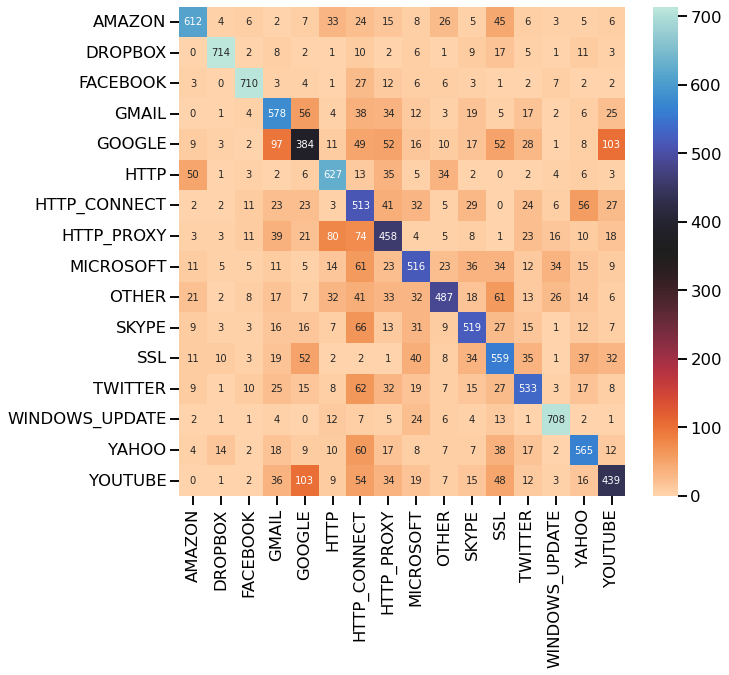

In [80]:
# Confusion matrix
sns.set_context("talk")
plt.figure(figsize=(10, 9))
sns.heatmap(confusion_matrix(y_test_origLabels, y_pred_origLabels),
            annot=True, xticklabels=le.classes_, yticklabels=le.classes_, fmt="g", cmap="icefire_r",  annot_kws={"fontsize":10})

**Summary:** The RandomForestClassifier with default configuration gave us an accuracy of 0.699, and it took 42 sec to fit the model.

### Testing of xgboost

In [81]:
xgb = XGBClassifier()

In [82]:
start_time = time.time()
xgb.fit(X_train,y_train)
end_time = time.time()
total_time_rf = end_time - start_time
print("Training of the XGBoostClassifier with default configuration took " + str(total_time_rf) + " s.")

Training of the XGBoostClassifier with default configuration took 102.58353734016418 s.


In [83]:
y_pred = xgb.predict(X_test)

In [84]:
y_pred_origLabels = le.inverse_transform(y_pred)
y_test_origLabels = le.inverse_transform(y_test)

In [85]:
# https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f
print(classification_report(y_test_origLabels, y_pred_origLabels))
print(accuracy_score(y_test_origLabels, y_pred_origLabels))
print(classification_report(y_test_origLabels, y_pred_origLabels, output_dict = True)["accuracy"])

                precision    recall  f1-score   support

        AMAZON       0.83      0.77      0.80       807
       DROPBOX       0.96      0.93      0.94       792
      FACEBOOK       0.94      0.93      0.93       789
         GMAIL       0.76      0.77      0.76       804
        GOOGLE       0.57      0.52      0.54       842
          HTTP       0.73      0.80      0.76       793
  HTTP_CONNECT       0.49      0.66      0.57       797
    HTTP_PROXY       0.58      0.61      0.59       774
     MICROSOFT       0.72      0.68      0.70       814
         OTHER       0.76      0.60      0.67       818
         SKYPE       0.78      0.77      0.77       754
           SSL       0.65      0.70      0.68       846
       TWITTER       0.75      0.73      0.74       791
WINDOWS_UPDATE       0.91      0.91      0.91       791
         YAHOO       0.82      0.81      0.81       790
       YOUTUBE       0.64      0.59      0.61       798

      accuracy                           0.73 

<AxesSubplot:>

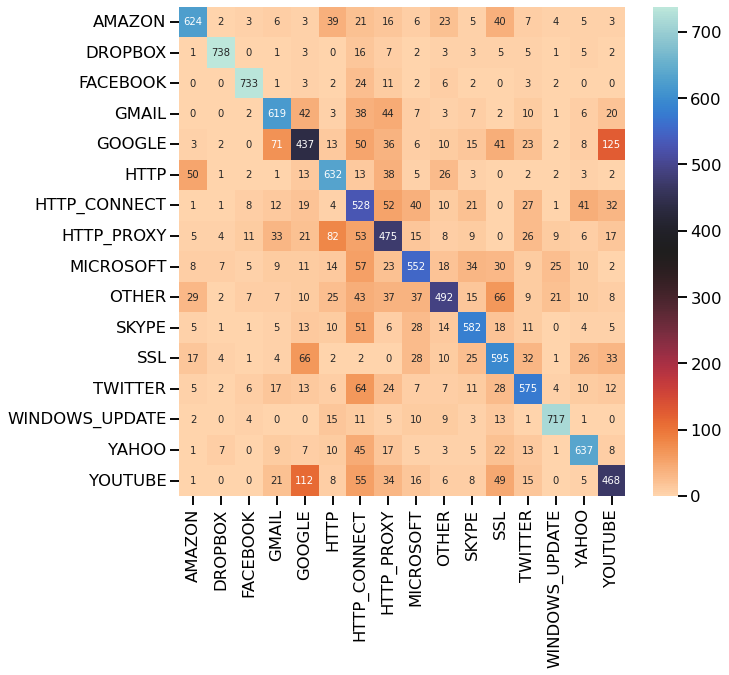

In [86]:
# Confusion matrix
sns.set_context("talk")
plt.figure(figsize=(10, 9))
sns.heatmap(confusion_matrix(y_test_origLabels, y_pred_origLabels),
            annot=True, xticklabels=le.classes_, yticklabels=le.classes_, fmt="g", cmap="icefire_r",  annot_kws={"fontsize":10})

**Summary:** The XGBClassifier with default configuration gave us an accuracy of 0.73, and it took 120 sec to fit the model.

### Evaluation of the rudimentary models

As a result of this initial analysis we saw, that the Random Forest and the XGBoost with default parameters performed fairly similarly in terms of accuracy (0.73 (xgb) vs. 0.70 (rf)). However, as for as the resource usage and the time is concerned, we had far more favourable results for the RandomForestClassifier, where the model was fitted in ~ 40 sec, meanwhile the XGBoost was trained within ~120 sec.

**Way forward:** By taking into consideration the results above, and also the limited resources of the computer, that I need to deal with, I decided to continue with RandomForestClassifier, on which I will perform the hyperparameter tuning. 

**Remark:** Nowadays, increasing attention is paid to xgboost, which regularly produces the best result also in Kaggle competitions. In general, XGBoost is considered to be a more powerful and accurate algorithm than Random Forest, for a few reasons. First, XGBoost uses decision trees as its base learners, but it also includes additional features such as regularization and boosting, which can improve the performance of the model. Additionally, XGBoost is able to handle missing values and large amounts of data more effectively than Random Forest, which can further improve its accuracy. Finally, XGBoost also has more flexible hyperparameters, which allows users to better fine-tune the model to their specific dataset. Despite all of these, I will continue with RandomForest for the rest of this project.

## Evaluation and model refinement

### Hyperparameter tuning for RandomForest

The model refinement and parameter tuning was performed three times. In each case, different encoding methods were deployed for the categorical data:
- 1st method: binary encoding
- 2nd method: base5 encoding
- 3rd method: label/ordinal encoding

The hyperparameter tuning was done separately for all 3 datasets with different categorical feature encoding. At the end, the results will be compared to decide, which encoding ensured us the best predictive performance.

First, we will identify those parameters, which would be worth to be tuned.

**The ultimate goal is to make a grid search with the help of the chosen parameters.**

Before doing that, we need to get an impression, which parameters have an effect on the result (accuary), and in which range we need to perform the grid search, so that we can find the most appropriate, optimal parameters.

In [87]:
random_forest = RandomForestClassifier()
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

By taking a closer look to the parameters, I decided to make an investigation on the following ones:
- `n_estimators` : Number of trees in the random forest.
- `max_features` : Number of features to consider at every split.
- `max_depth`: Maximum number of levels in the tree.
- `min_samples_split`: The minimum number of samples required to split an internal node.

### Investigation of the effect of `n_estimators`

In [88]:
accuracy_n_estimators = []
i_n_estimators = []

for i in range(50, 500, 50):
    random_forest = RandomForestClassifier(n_estimators = i, random_state = 42, n_jobs = -1)
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test)
    i_n_estimators.append(i)
    accuracy_n_estimators.append(accuracy_score(y_test, y_pred))

### Investigation of the effect of `max_depth`

In [89]:
i_max_depth = []
accuracy_max_depth = []

for i in range(2, 31, 3):
    random_forest = RandomForestClassifier(max_depth = i, random_state = 42, n_jobs = -1)
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test)
    i_max_depth.append(i)
    accuracy_max_depth.append(accuracy_score(y_test, y_pred))

### Investigation of the effect of `max_features`

In [90]:
i_max_features = []
accuracy_max_features = []

for i in range(1, df.shape[1]-1,5):
    random_forest = RandomForestClassifier(max_features = i, random_state = 42, n_jobs = -1)
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test)
    i_max_features.append(i)
    accuracy_max_features.append(accuracy_score(y_test, y_pred))

### Investigation of the effect of `min_samples_split`

In [91]:
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)

i_min_samples_split = []
accuracy_min_samples_split = []

for i in min_samples_split:
    random_forest = RandomForestClassifier(min_samples_split = i, random_state = 42, n_jobs = -1)
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test)
    i_min_samples_split.append(i)
    accuracy_min_samples_split.append(accuracy_score(y_test, y_pred))

### Visualizations

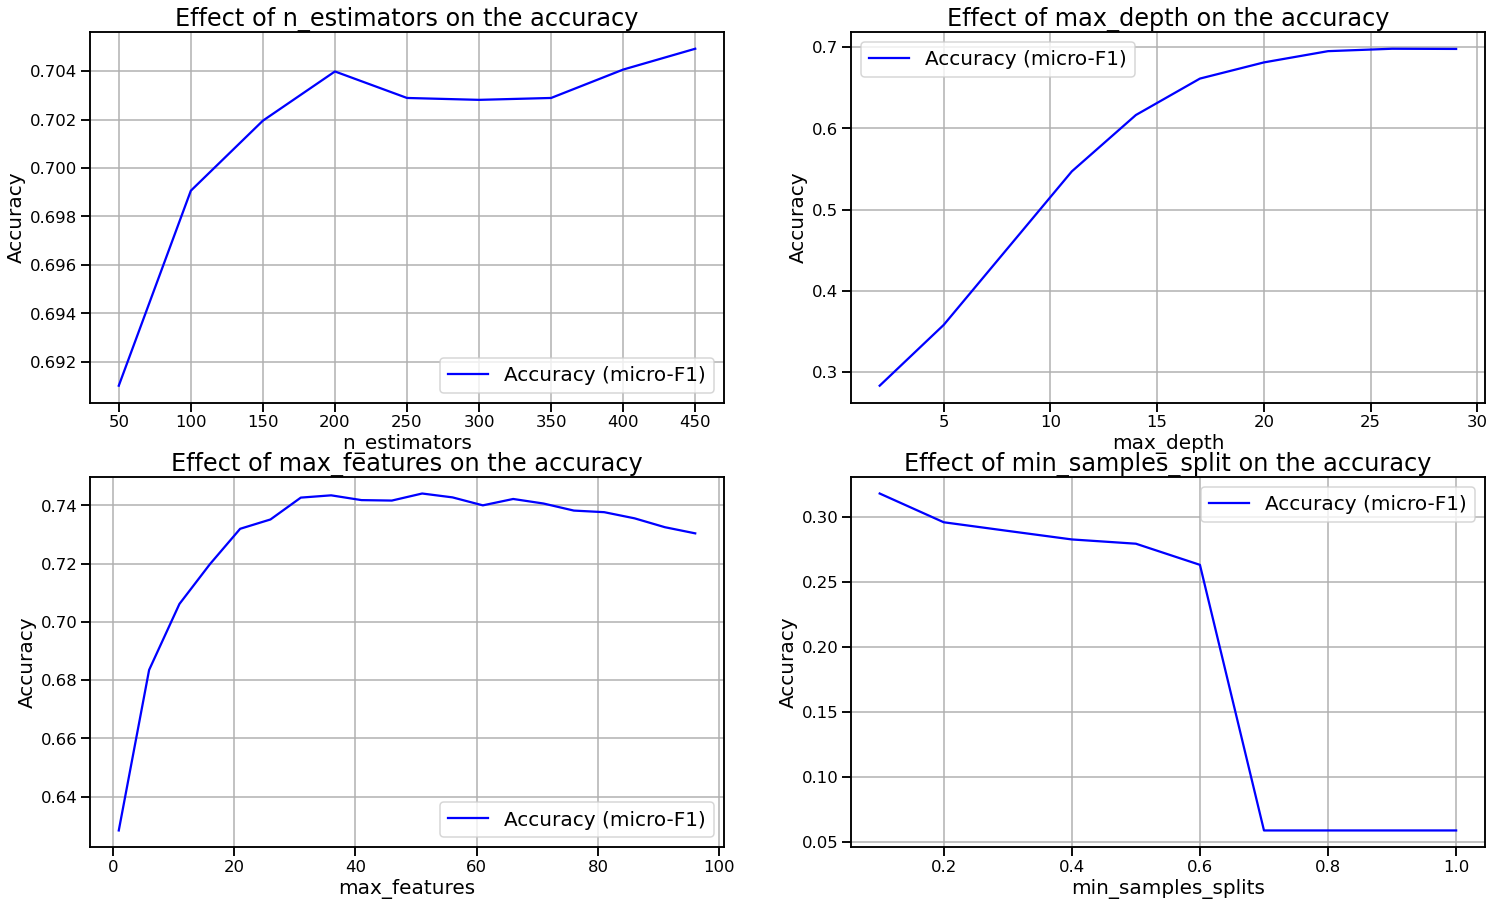

In [92]:
fig, axs = plt.subplots(2, 2, figsize=(25, 15))

# n_estimators
axs[0,0].plot(i_n_estimators, accuracy_n_estimators, 'b', label= "Accuracy (micro-F1)")
axs[0,0].set_title("Effect of n_estimators on the accuracy", fontsize=24)
axs[0,0].set_xlabel("n_estimators", fontsize=20)
axs[0,0].set_ylabel("Accuracy", fontsize=20)
axs[0,0].legend(fontsize = 20)
axs[0,0].grid()

# max_depth
axs[0,1].plot(i_max_depth, accuracy_max_depth, 'b', label= "Accuracy (micro-F1)")
axs[0,1].set_title("Effect of max_depth on the accuracy", fontsize=24)
axs[0,1].set_xlabel("max_depth", fontsize=20)
axs[0,1].set_ylabel("Accuracy", fontsize=20)
axs[0,1].legend(fontsize = 20)
axs[0,1].grid()

# max_features
axs[1,0].plot(i_max_features, accuracy_max_features, 'b', label= "Accuracy (micro-F1)")
axs[1,0].set_title("Effect of max_features on the accuracy", fontsize=24)
axs[1,0].set_xlabel("max_features", fontsize=20)
axs[1,0].set_ylabel("Accuracy", fontsize=20)
axs[1,0].legend(fontsize = 20)
axs[1,0].grid()

# min_samples_split
axs[1,1].plot(i_min_samples_split, accuracy_min_samples_split, 'b', label= "Accuracy (micro-F1)")
axs[1,1].set_title("Effect of min_samples_split on the accuracy", fontsize=24)
axs[1,1].set_xlabel("min_samples_splits", fontsize=20)
axs[1,1].set_ylabel("Accuracy", fontsize=20)
axs[1,1].legend(fontsize = 20)
axs[1,1].grid()

**Conclusions:**
- `n_estimators` increases the accuracy, even above n_estimators = 400
- `max_features`: It also seems to be visible, that approximately 50 features contribute significantly to the model performance, the rest of that (approx. 50 features) almost have zero benefit considering the accuracy. If the max_features is too high (approx. 60<), the accuracy even starts to decrease (overfitting might be happening).
- `max_depth`: The max_depth seems to be improving the accuracy, until max_depth = 25. Above that, the accuracy seems to be saturating.
- `min_samples_split`: The performance of the models are drastically decreased, if the value of min_samples_split differs from 2. We can clearly see that when we require all of the samples at each node, the model cannot learn enough about the data. This is an underfitting case. It can already be concluded, that it does not worth to change the default value of min_samples_split, we should set that to 2 during the grid search.

In [93]:
#stop here

## Grid search to find the best parameter set

In [94]:
import traceback
from joblib.externals.loky import set_loky_pickler
from joblib import parallel_backend
from joblib import Parallel, delayed
from joblib import wrap_non_picklable_objects

By checking the visualizations above, I've decided to use the following grid search parameters:

In [95]:
from sklearn.model_selection import ParameterGrid
param_grid = {
    'bootstrap': [True],
    'max_features': [50, 55, 60, 65, 70],
    'n_estimators': [350, 400, 450, 500],
    'max_depth': [25, 30, 40],
    'n_jobs': [-1]}

In [96]:
# GridSearch fails with parallel computing (if n_jobs != 1), therefore we do not use that
# rf = RandomForestClassifier()
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                          cv = 2, n_jobs = -1, pre_dispatch = '2*n_jobs', verbose = 3)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [97]:
rf = RandomForestClassifier()

We avoid using GridSearchCV, since we would like to avoid the usage of excessive resources, that CV need, additionally GridSearhCV failed to be executed on my computed with parallel computing (n_jobs = -1), therefore it would have been extremely slow to perform that. Instead of that, the below code section performs the grid search without a cross-validation.

In [98]:
start_time = time.time()

In [99]:
best_accuracy = 0
for g in ParameterGrid(param_grid):
    rf.set_params(**g)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred)
    # save if best
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_grid = g

In [100]:
end_time = time.time()
total_time_grid_search = end_time - start_time
print("The grid search took " + str(total_time_grid_search) + " sec.")

The grid search took 9462.515364646912 sec.


In [101]:
best_grid

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 50,
 'n_estimators': 450,
 'n_jobs': -1}

In [102]:
best_accuracy

0.74890625

## Evaluation of the best model

With the optimal parameter set, that was identified above, the extended (240000 records) dataset was used to fit a model. The following results were obtained.

In [103]:
random_forest = RandomForestClassifier()
random_forest.set_params(**best_grid)
random_forest.fit(X_train_ext, y_train_ext)
y_pred_ext = random_forest.predict(X_test_ext)

y_pred_origLabels = le.inverse_transform(y_pred_ext)
y_test_origLabels = le.inverse_transform(y_test_ext)

print(classification_report(y_test_origLabels, y_pred_origLabels))
print(accuracy_score(y_test_origLabels, y_pred_origLabels))

                precision    recall  f1-score   support

        AMAZON       0.87      0.86      0.86      2958
       DROPBOX       0.98      0.96      0.97      2996
      FACEBOOK       0.96      0.96      0.96      3018
         GMAIL       0.78      0.85      0.82      2917
        GOOGLE       0.63      0.61      0.62      2986
          HTTP       0.82      0.84      0.83      3017
  HTTP_CONNECT       0.63      0.73      0.67      3062
    HTTP_PROXY       0.66      0.67      0.67      3003
     MICROSOFT       0.88      0.83      0.85      3028
         OTHER       0.88      0.76      0.82      2970
         SKYPE       0.88      0.88      0.88      3025
           SSL       0.78      0.86      0.82      2999
       TWITTER       0.89      0.89      0.89      3014
WINDOWS_UPDATE       0.95      0.96      0.96      2949
         YAHOO       0.90      0.89      0.90      3040
       YOUTUBE       0.75      0.65      0.70      3018

      accuracy                           0.82 

<AxesSubplot:>

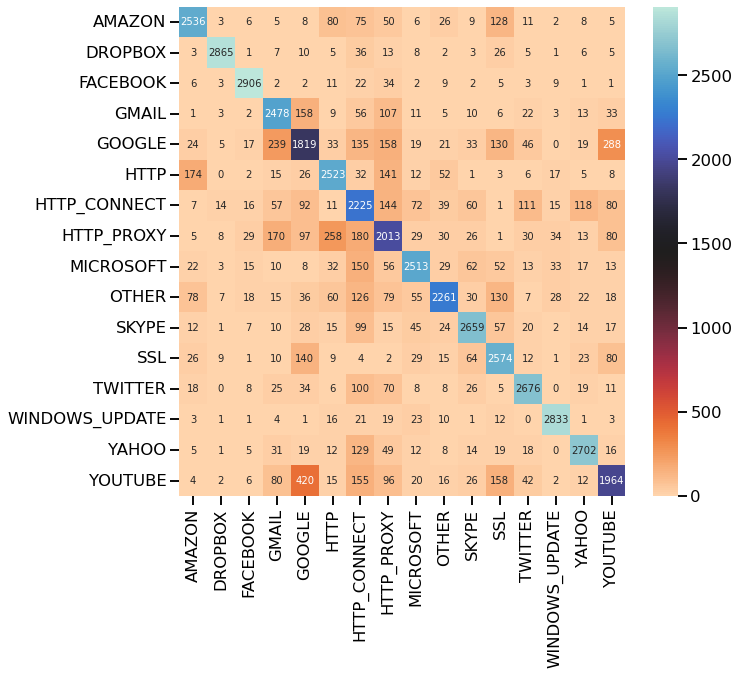

In [104]:
# Confusion matrix
sns.set_context("talk")
plt.figure(figsize=(10, 9))
sns.heatmap(confusion_matrix(y_test_origLabels, y_pred_origLabels),
            annot=True, xticklabels=le.classes_, yticklabels=le.classes_, fmt="g", cmap="icefire_r",  annot_kws={"fontsize":10})

# Conclusion, summary

The model refinement and parameter tuning was performed three times. In each case, different encoding methods were deployed for the categorical data:
- 1st method: binary encoding
- 2nd method: baseN (N = 5) encoding
- 3rd method: label/ordinal encoding

The hyperparameter tuning was done separately for all 3 datasets with different categorical feature encoding.

## Final results

We have obtained very similar results using the 3 encoding methods:
- with **label/ordinal** encoding:
    - **best micro-F1: 0.814**
    - best parameter set: {'bootstrap': True, 'max_depth': 30, 'max_features': 60, 'n_estimators': 550}
- with **binary** encoding:
    - **best micro-F1: 0.823**
    - best parameter set:  {'bootstrap': True, 'max_depth': 30, 'max_features': 55, 'n_estimators': 400}

- with **baseN (N=5)** encoding:
    - **best micro-F1: 0.824**
    - best parameter set: {'bootstrap': True, 'max_depth': 40, 'max_features': 50, 'n_estimators': 450}

**This means, that we've managed to achieve the best results (best micro-F1 = 0.824) using the base5 encoding, where the parameters of the RandomForestClassifier were:**

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 50,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 450,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Remarks:**

1) It is visible, that we've received the best restults, when the max. features was set to 50, meaning, there are at least 30+ features in the data, which does not help in predicting the target variable (ProtocolName).

2) It can be seen in the confusion matrix, that Google and Youtube are regularly interchanged.

3) Google and Gmail often get mixed up as well according to the confustion matrices.

4) Overall, the different encoding techniques did not make a major difference, as far as the models' accuracy are concerned. As expected, the ordinal encoding provided us the worst results, and the base5 encoding the best (but only marginally better compated to binary encoding). However the major advantage of base5 encoding against binary encoding is, that the dataset contains 34 less features (columns).

# Improvement potentials for the future

The following could be done to enhance the accuracy of the model:
- Different machine learning algorithms could be used: we've already seen, that the xgboost with default parameters already performed better compared to the default RandomForest. With a proper hyperparameter tuning, that model performance could be increased.
- Since we have a lot of records, using a neural network could also be an option.
- More refined sampling methods could be used, since we were using the most naive RandomUnderSampler.
- More data (extended sample size) could have been used for the grid search, if we would not have the limitations regarding the computational resources.

# Save workspace

In [105]:
# Manipulations are needed with the system path to have access to all required packages
import sys
sys.path
sys.path.append('C:\\Users\\AVA2BP\\.conda\\envs\\custom_environment\\Lib\\site-packages')
orig_sys_path = sys.path
sys.path = ['C:\\Program Files\\Anaconda3\\python39.zip',
 'C:\\Program Files\\Anaconda3\\DLLs',
 'C:\\Program Files\\Anaconda3\\lib',
 'C:\\Program Files\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Program Files\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Program Files\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Program Files\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Program Files\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\AVA2BP\\.ipython',
 'C:\\Users\\AVA2BP\\.conda\\envs\\custom_environment\\Lib\\site-packages']
import dill
sys.path = orig_sys_path

In [108]:
#dill.dump_session('OTP06A_MatMod_branch_final_joined_base5.db')

In [107]:
#dill.load_session('... .db')